# Installing Required Libraries

In [1]:
if (!require(caret)) {
  install.packages("caret")
  library(caret)
}

if (!require(corrplot)) {
  install.packages("corrplot")
  library(corrplot)
}


if (!require(Metrics)) {
  install.packages("Metrics")
  library(Metrics)
}

if (!require(stats)) {
    install.packages("stats")
    library(stats)
}




Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded

Loading required package: Metrics

Warning message in library(pa

In [2]:
if (!require(leaps)) {
    install.packages("leaps")
    library(leaps)
}

Loading required package: leaps

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘leaps’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
if (!require(combinat)) {
    install.packages("combinat")
    library(combinat)
}


Loading required package: combinat

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘combinat’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘combinat’


The following object is masked from ‘package:utils’:

    combn




In [4]:
library(readxl)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Loading Dataset

In [5]:
# Load the dataset
car_sales_data <- read_excel("/content/Car Sales Data.xlsx")


# Data Preprocessing

## validate column names, remove spaces


In [6]:

colnames(car_sales_data) <- gsub(" ", "_", trimws(tolower(colnames(car_sales_data))))
car_sales_data <- car_sales_data %>%
  rename(price = `price_($)`)

print(colnames(car_sales_data))

 [1] "car_id"        "date"          "customer_name" "gender"       
 [5] "annual_income" "dealer_name"   "company"       "model"        
 [9] "engine"        "transmission"  "color"         "price"        
[13] "dealer_no"     "body_style"    "phone"         "dealer_region"
[17] "age"          



## Removing the irrelevant features for analysis

In [7]:
# Data Pre-processing

new_data <- car_sales_data[, !(names(car_sales_data) %in% c("phone", "car_id", "customer_name"))]
car_sales_data <- new_data
names(car_sales_data)

[1] "date"          "gender"        "annual_income" "dealer_name"  
 [5] "company"       "model"         "engine"        "transmission" 
 [9] "color"         "price"         "dealer_no"     "body_style"   
[13] "dealer_region" "age"

## Checking for missing and duplicate values in the dataset

In [8]:
# Checking for missing and duplicate values in the dataset

missing_values <- sapply(car_sales_data, function(x) sum(is.na(x)))
missing_values_df <- data.frame(Column = names(missing_values), MissingCount = missing_values, stringsAsFactors = FALSE)
rownames(missing_values_df) <- NULL
print(missing_values_df)

          Column MissingCount
1           date            0
2         gender            0
3  annual_income            0
4    dealer_name            0
5        company            0
6          model            0
7         engine            0
8   transmission            0
9          color            0
10         price            0
11     dealer_no            0
12    body_style            0
13 dealer_region            0
14           age            0


## Check for duplicates

In [9]:


duplicates <- sum(duplicated(car_sales_data))
print(paste("Number of duplicate records:", duplicates))

# Handling the date columns in the dataset
car_sales_data$date <- as.Date(car_sales_data$date, format="%Y-%m-%d")
car_sales_data$year <- as.numeric(format(car_sales_data$date, "%Y"))
car_sales_data$month <- as.numeric(format(car_sales_data$date, "%m"))
car_sales_data$day <- as.numeric(format(car_sales_data$date, "%d"))


[1] "Number of duplicate records: 0"


## Data Type Checking for Each Column

In [10]:
# Data Type Checking for Each Column

data_types <- sapply(car_sales_data, class)
data_types_df <- data.frame(Column = names(data_types), data_type = data_types, stringsAsFactors = FALSE)
rownames(data_types_df) <- NULL

for (i in 1:nrow(data_types_df)) {
  col_name <- data_types_df$Column[i]
  new_data_type <- data_types_df$data_type[i]

  # Update the data type of the column in car_sales_data
  car_sales_data[[col_name]] <- as(car_sales_data[[col_name]], new_data_type)
}

data_types_updated <- sapply(car_sales_data, class)
data_types_df_updated <- data.frame(Column = names(data_types_updated), data_type = data_types_updated, stringsAsFactors = FALSE)
rownames(data_types_df_updated) <- NULL
print(data_types_df_updated)


          Column data_type
1           date      Date
2         gender character
3  annual_income   numeric
4    dealer_name character
5        company character
6          model character
7         engine character
8   transmission character
9          color character
10         price   numeric
11     dealer_no character
12    body_style character
13 dealer_region character
14           age   numeric
15          year   numeric
16         month   numeric
17           day   numeric


## Summary Statistics of the dataset

In [12]:
summary_statistics_numeric <- car_sales_data %>%
  select_if(is.numeric) %>%
  summary()

print(summary_statistics_numeric)


 annual_income          price            age             year     
 Min.   :   10080   Min.   : 1200   Min.   :18.00   Min.   :2020  
 1st Qu.:  386000   1st Qu.:18001   1st Qu.:35.00   1st Qu.:2020  
 Median :  735000   Median :23000   Median :52.00   Median :2021  
 Mean   :  830840   Mean   :28090   Mean   :51.53   Mean   :2021  
 3rd Qu.: 1175750   3rd Qu.:34000   3rd Qu.:68.00   3rd Qu.:2021  
 Max.   :11200000   Max.   :85800   Max.   :85.00   Max.   :2021  
     month             day       
 Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 5.000   1st Qu.: 8.00  
 Median : 9.000   Median :15.00  
 Mean   : 7.853   Mean   :15.47  
 3rd Qu.:11.000   3rd Qu.:23.00  
 Max.   :12.000   Max.   :31.00  


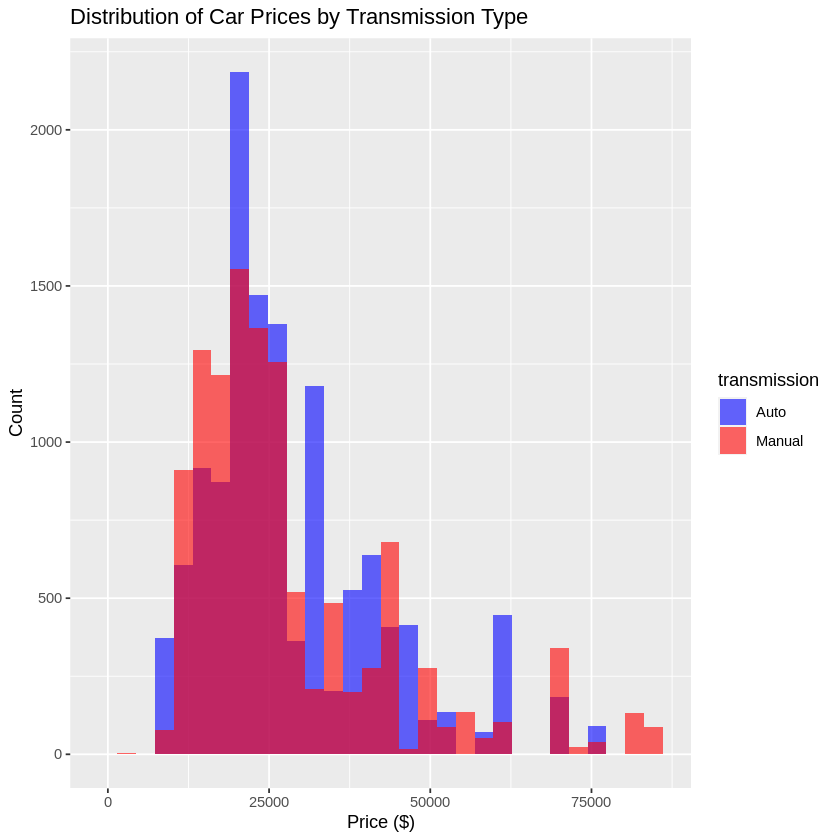

In [13]:
library(ggplot2)


ggplot(car_sales_data, aes(x = `price`, fill = transmission)) +
  geom_histogram(alpha = 0.6, bins = 30, position = "identity") +
  labs(title = "Distribution of Car Prices by Transmission Type", x = "Price ($)", y = "Count") +
  scale_fill_manual(values = c("blue", "red"))


## Data Transformation

In [14]:
# Scale all numerical columns
car_sales_data$price_scaled <- scale(car_sales_data$price)
car_sales_data$annual_income_scaled <- scale(car_sales_data$annual_income)

# View changes
head(car_sales_data[, c("annual_income", "annual_income_scaled", "price", "price_scaled")])


annual_income,annual_income_scaled,price,price_scaled
<dbl>,"<dbl[,1]>",<dbl>,"<dbl[,1]>"
13500,-1.13518476,26000,-0.1413410
1480000,0.90160271,19000,-0.6146758
1035000,0.28355264,31500,0.2305649
13500,-1.13518476,14000,-0.9527720
1465000,0.88076956,24500,-0.2427699
850000,0.02661048,12000,-1.0880105


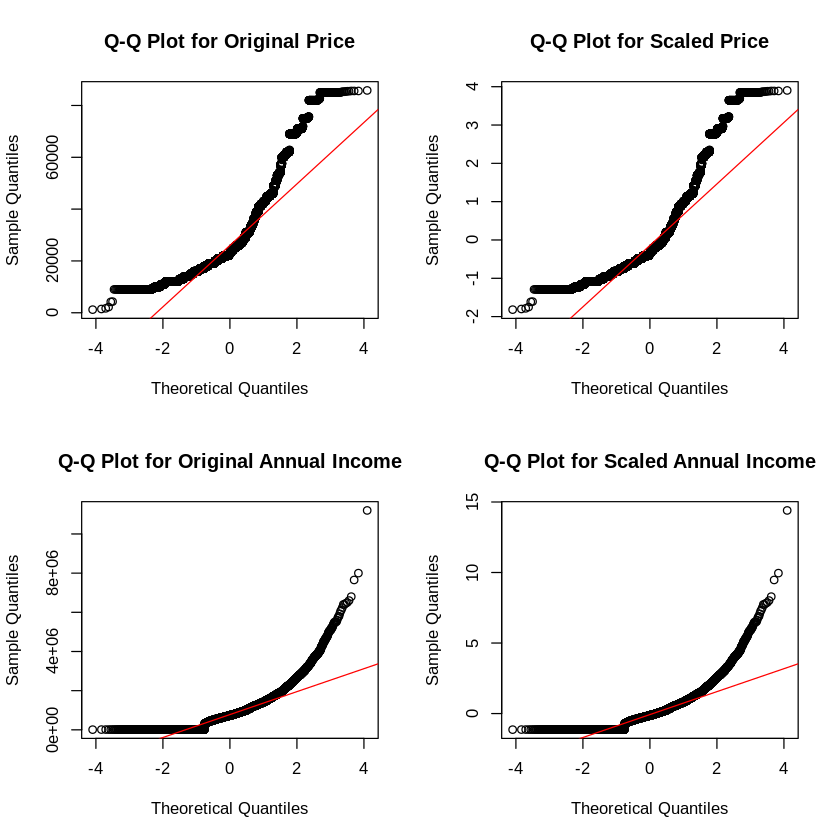

In [15]:
# Setting up the graphics layout for side-by-side comparison
par(mfrow = c(2, 2))

# Q-Q plots for original price
qqnorm(car_sales_data$price, main = "Q-Q Plot for Original Price")
qqline(car_sales_data$price, col = "red")

# Q-Q plots for scaled price
qqnorm(car_sales_data$price_scaled, main = "Q-Q Plot for Scaled Price")
qqline(car_sales_data$price_scaled, col = "red")

# Q-Q plots for original annual income
qqnorm(car_sales_data$annual_income, main = "Q-Q Plot for Original Annual Income")
qqline(car_sales_data$annual_income, col = "red")

# Q-Q plots for scaled annual income
qqnorm(car_sales_data$annual_income_scaled, main = "Q-Q Plot for Scaled Annual Income")
qqline(car_sales_data$annual_income_scaled, col = "red")


## Applying Log Transformation

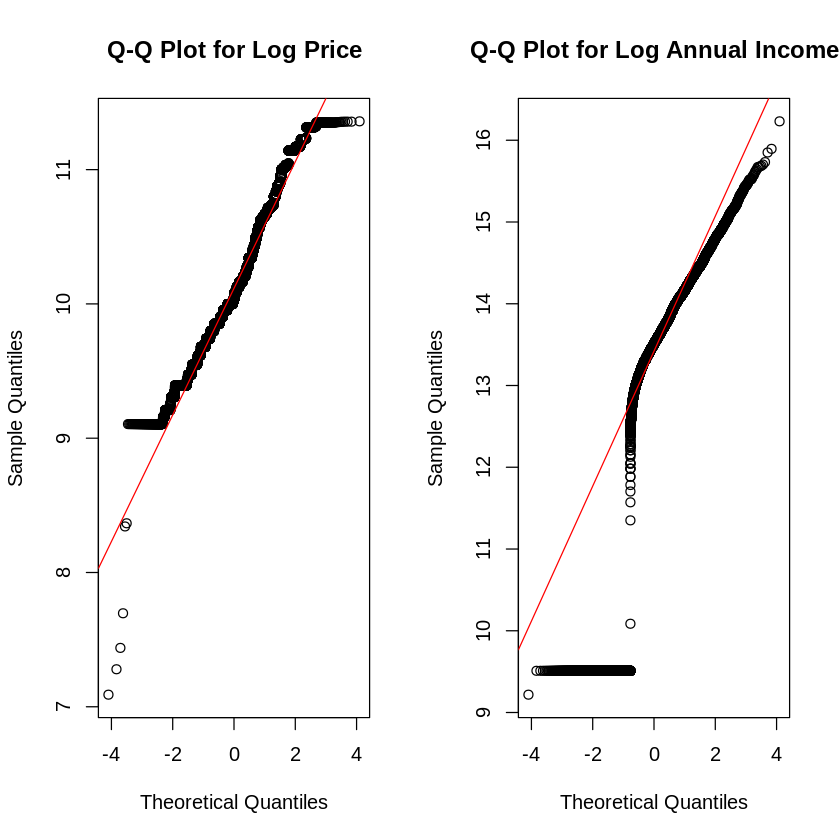

In [16]:
# Apply log transformation if no zero or negative values are present
if (all(car_sales_data$price > 0)) {
  car_sales_data$log_price <- log(car_sales_data$price)
}

if (all(car_sales_data$annual_income > 0)) {
  car_sales_data$log_annual_income <- log(car_sales_data$annual_income)
}


# Q-Q plots for log-transformed data
par(mfrow = c(1, 2))
qqnorm(car_sales_data$log_price, main = "Q-Q Plot for Log Price")
qqline(car_sales_data$log_price, col = "red")
qqnorm(car_sales_data$log_annual_income, main = "Q-Q Plot for Log Annual Income")
qqline(car_sales_data$log_annual_income, col = "red")


## Applying Square root Transformation

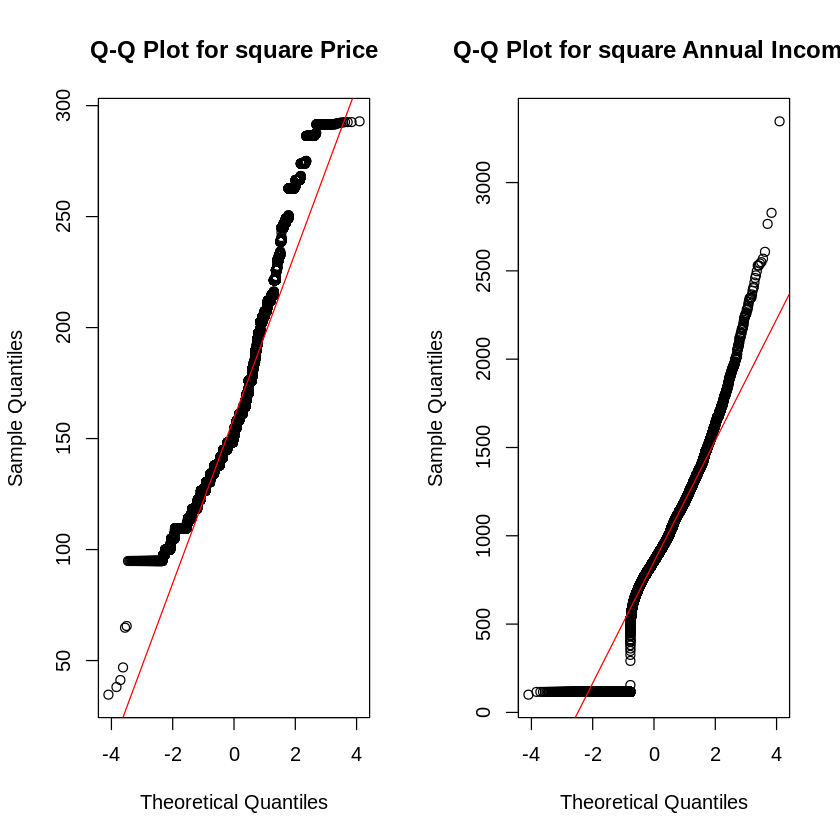

In [17]:
# Apply square root transformation
car_sales_data$sqrt_price <- sqrt(car_sales_data$price)
car_sales_data$sqrt_annual_income <- sqrt(car_sales_data$annual_income)

# Q-Q plots for log-transformed data
par(mfrow = c(1, 2))
qqnorm(car_sales_data$sqrt_price, main = "Q-Q Plot for square Price")
qqline(car_sales_data$sqrt_price, col = "red")
qqnorm(car_sales_data$sqrt_annual_income, main = "Q-Q Plot for square Annual Income")
qqline(car_sales_data$sqrt_annual_income, col = "red")

# Bootstrapping

## Main Code


Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma




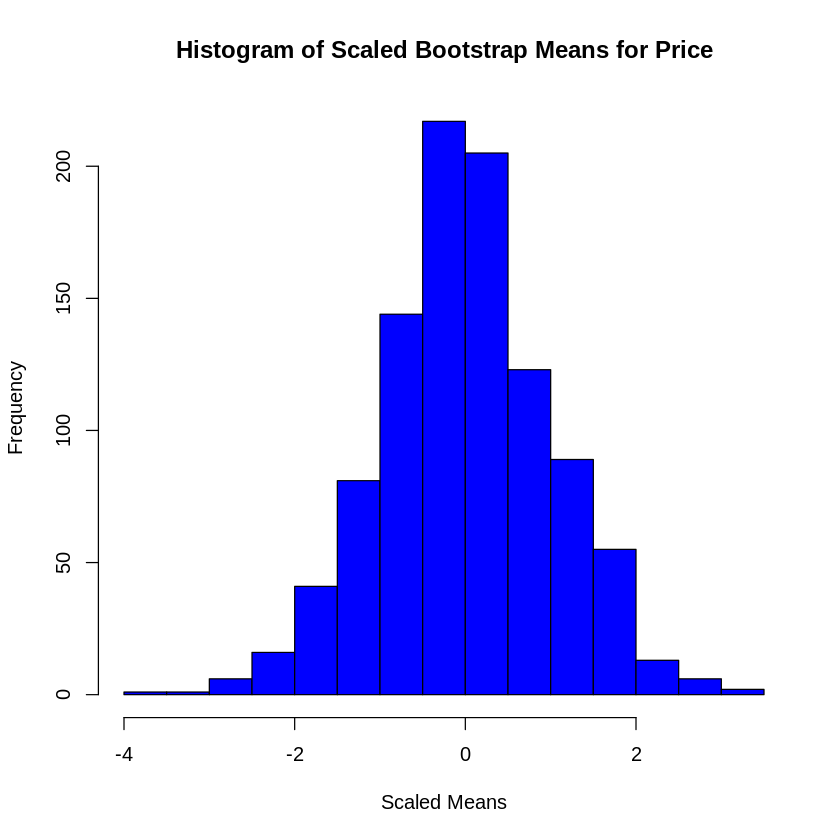

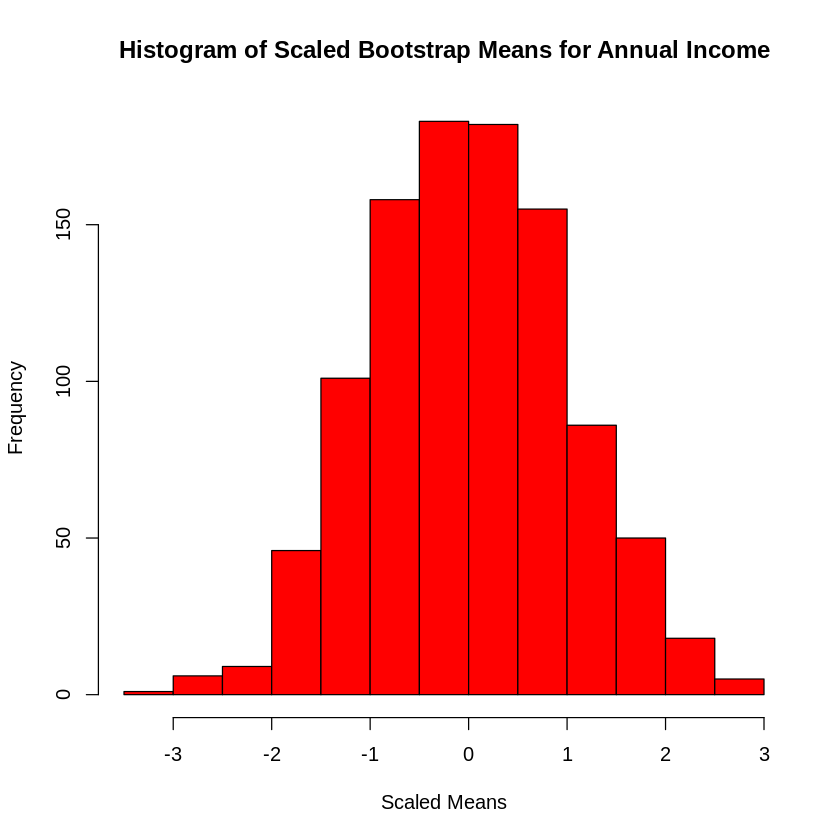

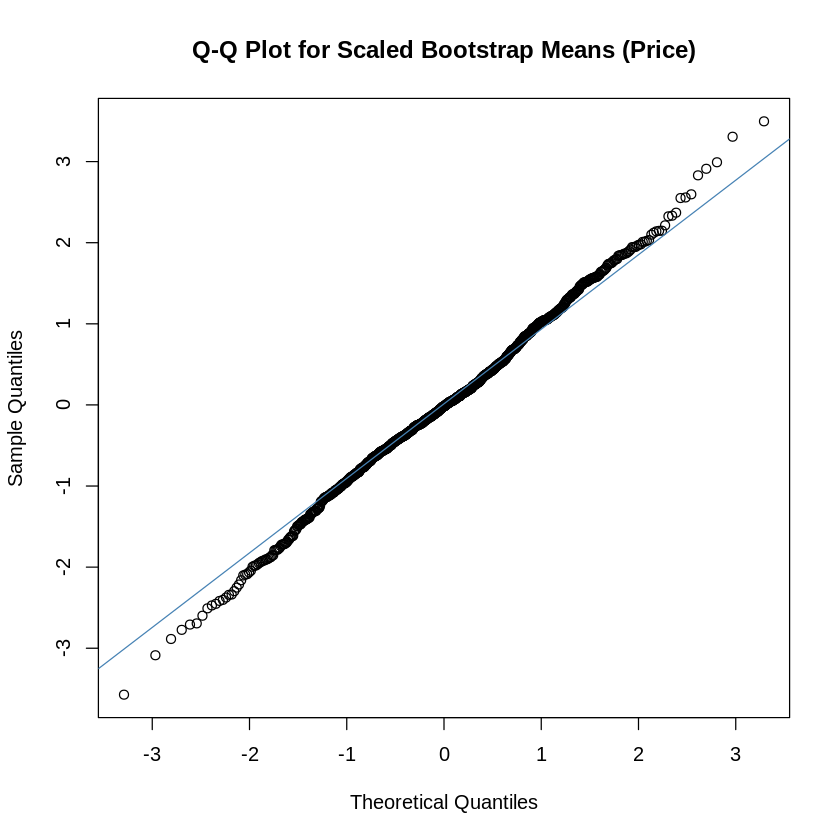

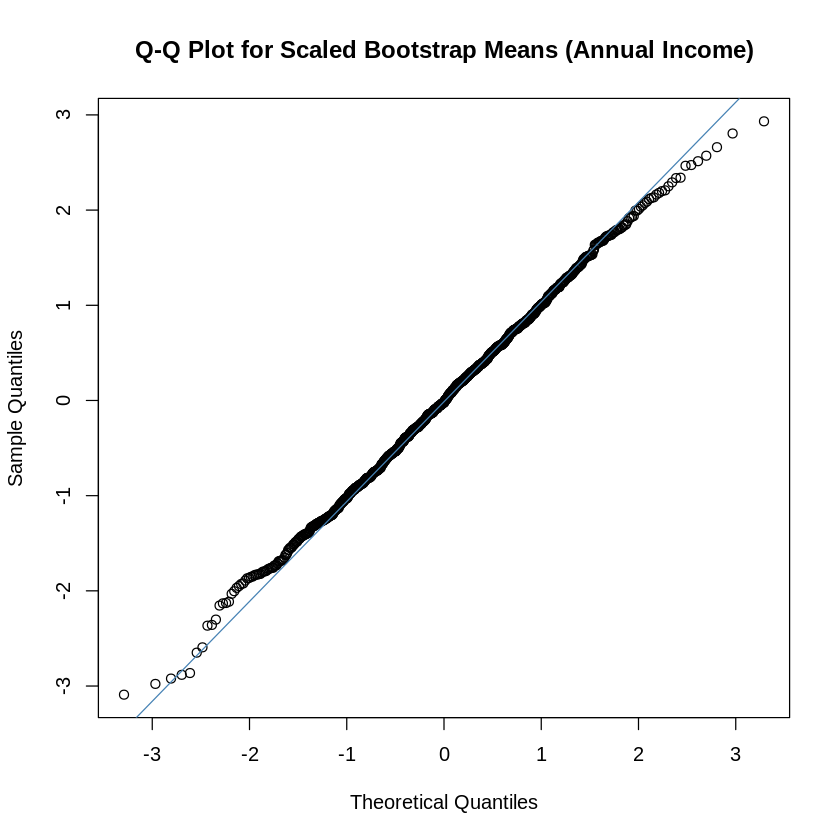

In [19]:
library(boot)

# Define a function to obtain a statistic, here the mean, from the data
bootstrap_stat <- function(data, indices) {
  d <- data[indices]
  mean(d)
}

# Perform bootstrap for price
set.seed(123)
boot_price <- boot(data = car_sales_data$price, statistic = bootstrap_stat, R = 1000)

# Perform bootstrap for annual income
boot_income <- boot(data = car_sales_data$annual_income, statistic = bootstrap_stat, R = 1000)



# Extract bootstrap estimates
price_means <- boot_price$t
income_means <- boot_income$t

# Scale these bootstrap estimates
scaled_price_means <- scale(price_means)
scaled_income_means <- scale(income_means)

# Histogram of scaled bootstrap means
hist(scaled_price_means, main = "Histogram of Scaled Bootstrap Means for Price", xlab = "Scaled Means", col = "blue")
hist(scaled_income_means, main = "Histogram of Scaled Bootstrap Means for Annual Income", xlab = "Scaled Means", col = "red")



# Plotting Q-Q plot for scaled bootstrap means to check normality
qqnorm(scaled_price_means, main = "Q-Q Plot for Scaled Bootstrap Means (Price)")
qqline(scaled_price_means, col = "steelblue")

qqnorm(scaled_income_means, main = "Q-Q Plot for Scaled Bootstrap Means (Annual Income)")
qqline(scaled_income_means, col = "steelblue")

In [20]:
mean_price <- mean(boot_price$t)
sd_price <- sd(boot_price$t)

mean_income <- mean(boot_income$t)
sd_income <- sd(boot_income$t)

## Confidence Intervals for the Price and Annual Incomes.

In [21]:
# Calculate mean and standard error
price_mean <- mean(boot_price$t)
price_se <- sd(boot_price$t)

# Calculate 95% Confidence Interval using Standard Error
price_ci_se <- c(price_mean - 1.96 * price_se, price_mean + 1.96 * price_se)
print(price_ci_se)

income_mean <- mean(boot_income$t)
income_se <- sd(boot_income$t)

income_ci_se <- c(income_mean - 1.96 * income_se, income_mean + 1.96 * income_se)
print(income_ci_se)

[1] 27896.40 28279.62
[1] 821611.5 839589.8


In [22]:
price_mean
income_mean

[1] 28088.01

[1] 830600.7

In [23]:
x_price <- seq(mean_price - 3 * sd_price, mean_price + 3 * sd_price, length.out = 100)
x_income <- seq(mean_income - 3 * sd_income, mean_income + 3 * sd_income, length.out = 100)

In [25]:

density_price <- dnorm(x_price, mean = mean_price, sd = sd_price)
density_income <- dnorm(x_income, mean = mean_income, sd = sd_income)

In [26]:
data_price <- data.frame(x = x_price, y = density_price)
data_income <- data.frame(x = x_income, y = density_income)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


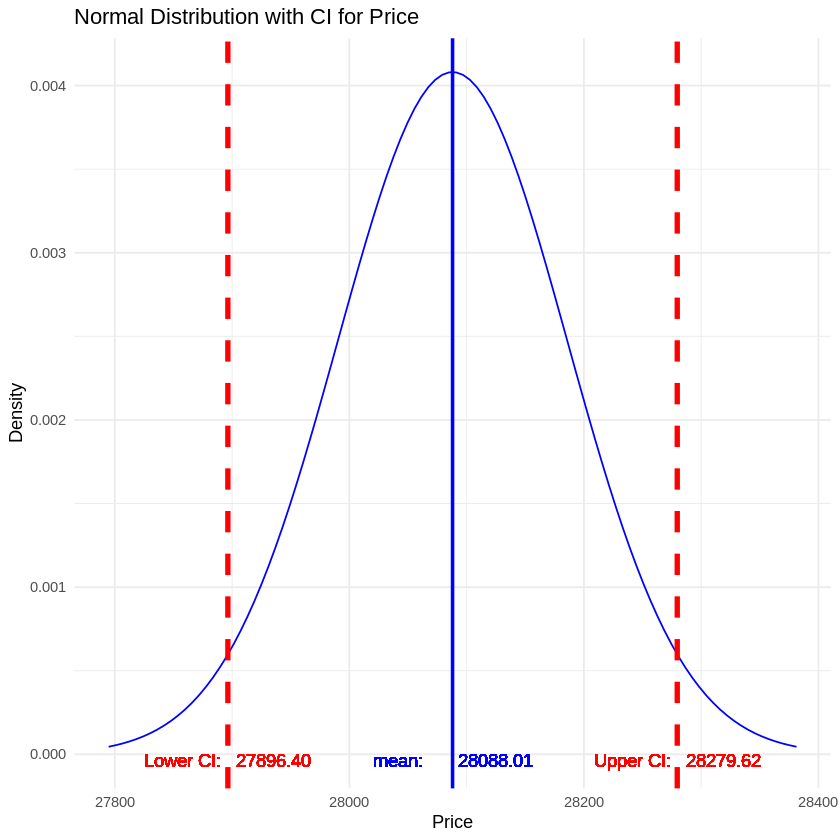

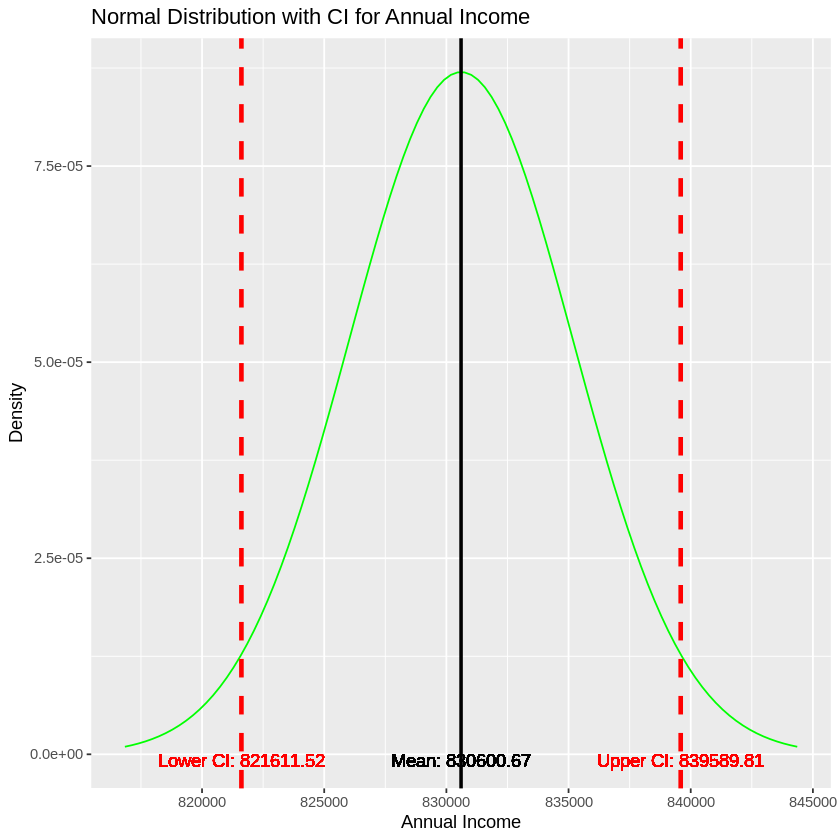

In [28]:
library(ggplot2)


# Plot for Price with annotations
plot_price <- ggplot(data_price, aes(x = x, y = y)) +
  geom_line(color = "blue") +
  geom_vline(xintercept = mean_price, color = "blue", linetype = "solid", size = 1) +
  geom_vline(xintercept = c(price_ci_se[1], price_ci_se[2]), color = "red", linetype = "dashed", size=1.5) +
  geom_text(aes(x = mean_price, y = 0, label = sprintf("mean:       %.2f", mean_price)), vjust = 1, color = "blue") +
  geom_text(aes(x = price_ci_se[1], y = 0, label = sprintf("Lower CI:   %.2f", price_ci_se[1])), vjust = 1, color = "red") +
  geom_text(aes(x = price_ci_se[2], y = 0, label = sprintf("Upper CI:   %.2f", price_ci_se[2])), vjust = 1, color = "red") +
  labs(title = "Normal Distribution with CI for Price", x = "Price", y = "Density") +
  theme_minimal()

# Plot for Annual Income with annotations
plot_income <- ggplot(data_income, aes(x = x, y = y)) +
  geom_line(color = "green") +
  geom_vline(xintercept = mean_income, color = "black", linetype = "solid", size = 1) +
  geom_vline(xintercept = c(income_ci_se[1], income_ci_se[2]), color = "red", linetype = "dashed", size =1.3) +
  geom_text(aes(x = mean_income, y = 0, label = sprintf("Mean: %.2f", mean_income)), vjust = 1, color = "black") +
  geom_text(aes(x = income_ci_se[1], y = 0, label = sprintf("Lower CI: %.2f", income_ci_se[1])), vjust = 1, color = "red") +
  geom_text(aes(x = income_ci_se[2], y = 0, label = sprintf("Upper CI: %.2f", income_ci_se[2])), vjust = 1, color = "red") +
  labs(title = "Normal Distribution with CI for Annual Income", x = "Annual Income", y = "Density")

print(plot_price)
print(plot_income)

## Hypothesis Test on Bootstrapped data:

* Null Hypothesis:The mean price or mean annual income equals the hypothesized value.

* Alternative Hypothesis:The mean price or mean annual income does not equals the hypothesized value.

In [29]:
library(ggplot2)
library(dplyr)


# Calculate the observed means and standard errors
price_mean <- mean(boot_price$t)
price_se <- sd(boot_price$t)
income_mean <- mean(boot_income$t)
income_se <- sd(boot_income$t)

# Calculate 95% Confidence Intervals
price_ci_se <- c(price_mean - 1.96 * price_se, price_mean + 1.96 * price_se)
income_ci_se <- c(income_mean - 1.96 * income_se, income_mean + 1.96 * income_se)

# Generate random hypothesized mean values within the range of observed data
set.seed(42)
hypothesized_price_mean <- runif(1, min(boot_price$t), max(boot_price$t))
hypothesized_income_mean <- runif(1, min(boot_income$t), max(boot_income$t))

# Calculate the t-statistics
price_t_statistic <- (price_mean - hypothesized_price_mean) / (price_se / sqrt(length(boot_price$t)))
income_t_statistic <- (income_mean - hypothesized_income_mean) / (income_se / sqrt(length(boot_income$t)))

# Calculate the p-values
price_p_value <- 2 * pt(-abs(price_t_statistic), df = length(boot_price$t) - 1)
income_p_value <- 2 * pt(-abs(income_t_statistic), df = length(boot_income$t) - 1)

# Check if the hypothesized values are within the calculated confidence intervals
price_in_ci <- hypothesized_price_mean >= price_ci_se[1] && hypothesized_price_mean <= price_ci_se[2]
income_in_ci <- hypothesized_income_mean >= income_ci_se[1] && hypothesized_income_mean <= income_ci_se[2]

# Print the results
cat("Price Hypothesized Mean: ", hypothesized_price_mean, "\n")
cat("Price T-Statistic: ", price_t_statistic, "\n")
cat("Price P-Value: ", price_p_value, "\n")
cat("Price within CI: ", price_in_ci, "\n\n")

cat("Income Hypothesized Mean: ", hypothesized_income_mean, "\n")
cat("Income T-Statistic: ", income_t_statistic, "\n")
cat("Income P-Value: ", income_p_value, "\n")
cat("Income within CI: ", income_in_ci, "\n")


Price Hypothesized Mean:  28370.94 
Price T-Statistic:  -91.52233 
Price P-Value:  0 
Price within CI:  FALSE 

Income Hypothesized Mean:  842311.3 
Income T-Statistic:  -80.74525 
Income P-Value:  0 
Income within CI:  FALSE 


Warning message in geom_vline(xintercept = mean(boot_price$t), color = "red", linetype = "dashed", :
“Ignoring unknown parameters: `label`”
Warning message in geom_vline(xintercept = 28370.94, color = "blue", linetype = "dashed", :
“Ignoring unknown parameters: `label`”
Warning message in geom_vline(xintercept = mean(boot_income$t), color = "red", linetype = "dashed", :
“Ignoring unknown parameters: `label`”
Warning message in geom_vline(xintercept = 842311.3, color = "blue", linetype = "dashed", :
“Ignoring unknown parameters: `label`”


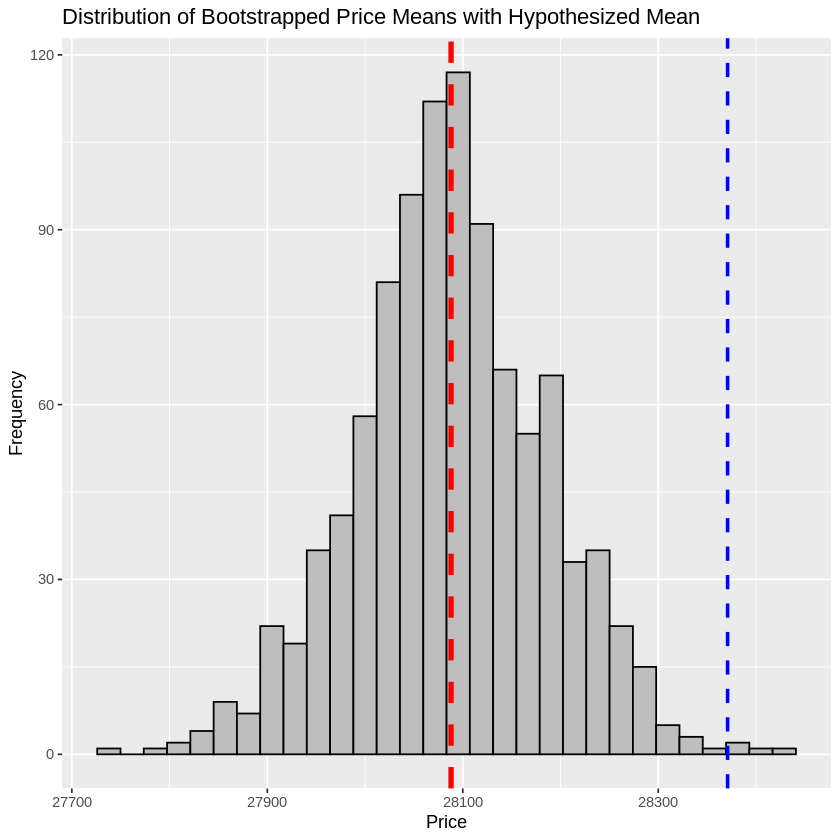

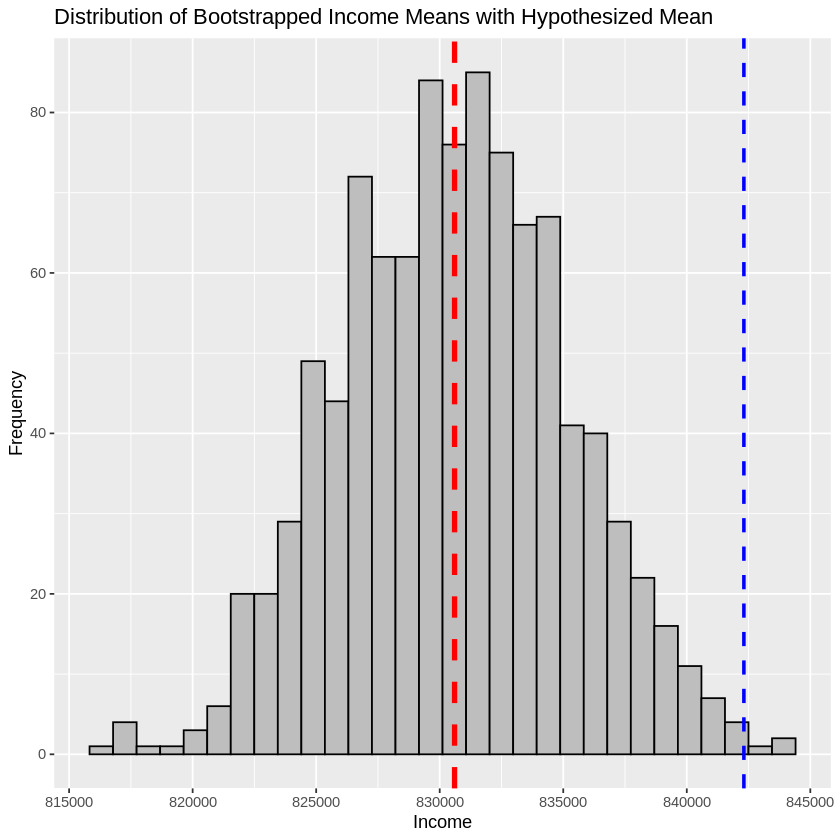

In [30]:
library(ggplot2)

# Visualize Price Distribution with Hypothesized Mean
ggplot(data.frame(Price = boot_price$t), aes(x = Price)) +
  geom_histogram(bins = 30, fill = "grey", color = "black") +
  geom_vline(xintercept = mean(boot_price$t), color = "red", linetype = "dashed", size = 1.5, label = "Observed Mean") +
  geom_vline(xintercept = 28370.94, color = "blue", linetype = "dashed", size = 1, label = "Hypothesized Mean") +
  labs(title = "Distribution of Bootstrapped Price Means with Hypothesized Mean", x = "Price", y = "Frequency")


# Visualize Price Distribution with Hypothesized Mean
ggplot(data.frame(income = boot_income$t), aes(x = income)) +
  geom_histogram(bins = 30, fill = "grey", color = "black") +
  geom_vline(xintercept = mean(boot_income$t), color = "red", linetype = "dashed", size = 1.5, label = "Observed Mean") +
  geom_vline(xintercept = 842311.3, color = "blue", linetype = "dashed", size = 1, label = "Hypothesized Mean") +
  labs(title = "Distribution of Bootstrapped Income Means with Hypothesized Mean", x = "Income", y = "Frequency")


#### Results/ Analysis:


| Variable | Hypothesized Mean | Confidence Interval | Within CI | T-Statistic | P-Value |
|----------|-------------------|---------------------|------------|-------------|---------|
| Price    | 28370.94          | [27896.40, 28279.62]| FALSE      | -91.52233   | 0       |
| Income   | 842311.3          | [821611.5, 839589.8] | FALSE      | -80.74525   | 0       |



1. Price:
  * The hypothesized mean price is $28370.94.
  * The observed price falls outside the confidence interval limits.
  * The t-statistic value of -91.52233 suggests a significant deviation from the hypothesized mean.
  * A p-value of 0, indicates strong evidence to reject the null hypothesis.

2. Income:
  * The hypothesized mean income is $842311.3.
  * Similar to price, the observed income falls outside the confidence interval limits.
  * The t-statistic value of -80.74525 suggests a significant deviation from the hypothesized mean.
  * A p-value of 0, indicates strong evidence against the null hypothesis.

## Normality checking with bootstrapping the dataset

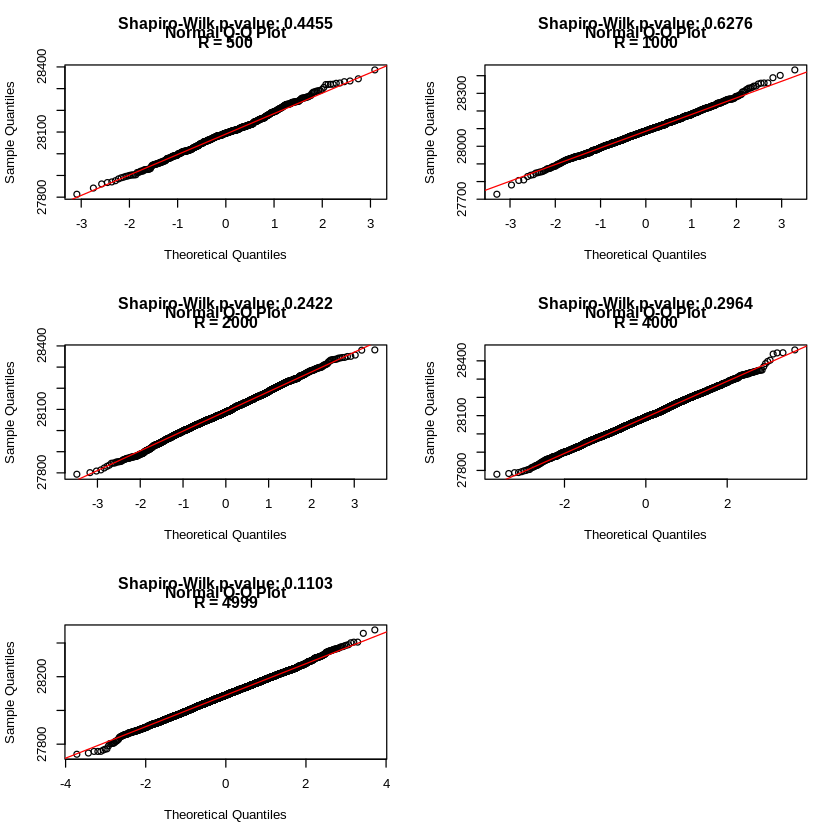

In [33]:
# Function to calculate the mean from bootstrap samples
bootstrap_stat <- function(data, indices) {
    d <- data[indices]  # Selects a bootstrap sample
    mean(d)
}


library(boot)

# Bootstrap at different R values
set.seed(123)
results <- lapply(c(500, 1000, 2000, 4000, 4999), function(r) {
    boot(data = car_sales_data$price, statistic = bootstrap_stat, R = r)
})

# Create an empty data frame to store the results
results_df <- data.frame(R = integer(), P_Value = numeric(), stringsAsFactors = FALSE)


par(mfrow = c(3, 2))

for (result in results) {
    # Extracting the bootstrap estimates
    estimates <- result$t

    # Q-Q Plot
    qqnorm(estimates)
    qqline(estimates, col = "red")

    # Conduct Shapiro-Wilk test and print results
    test <- shapiro.test(estimates)
    title(main = sprintf("Shapiro-Wilk p-value: %.4f\nR = %d", test$p.value, result$R))

    results_df <- rbind(results_df, data.frame(R = result$R, P_Value = test$p.value))


}




In [34]:
results_df

R,P_Value
<dbl>,<dbl>
500,0.4454739
1000,0.6276020
2000,0.2422149
4000,0.2963930
4999,0.1103231


p-values for every sample is greater than the threshold value of 0.05. So, we can say that the samples are normally distributed.

# Stratified sampling

In [35]:
library(dplyr)

set.seed(123)

# Creating a stratified sample: 20% of each stratum
strat_sample <- car_sales_data %>%
  group_by(company) %>%
  sample_frac(size = 0.2)

head(strat_sample)


date,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,⋯,age,year,month,day,price_scaled,annual_income_scaled,log_price,log_annual_income,sqrt_price,sqrt_annual_income
<date>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>
2021-06-11,Female,277500,Ryder Truck Rental and Leasing,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Pale White,16501,⋯,51,2021,6,11,-0.7836563,-0.7685213,9.711176,12.533576,128.4562,526.7827
2021-08-01,Male,1480000,Nebo Chevrolet,Acura,RL,Overhead Camshaft,Manual,Pale White,17000,⋯,54,2021,8,1,-0.7499143,0.9016027,9.740969,14.207553,130.3840,1216.5525
2020-09-21,Male,950000,Ryder Truck Rental and Leasing,Acura,RL,Overhead Camshaft,Manual,Pale White,17000,⋯,60,2020,9,21,-0.7499143,0.1654981,9.740969,13.764217,130.3840,974.6794
2021-09-20,Male,926000,Tri-State Mack Inc,Acura,RL,Overhead Camshaft,Manual,Red,34000,⋯,50,2021,9,20,0.3996130,0.1321651,10.434116,13.738630,184.3909,962.2889
2020-10-02,Male,13500,Tri-State Mack Inc,Acura,TL,Overhead Camshaft,Manual,Pale White,14000,⋯,76,2020,10,2,-0.9527720,-1.1351848,9.546813,9.510445,118.3216,116.1895
2020-07-02,Male,13500,Ryder Truck Rental and Leasing,Acura,RL,Overhead Camshaft,Manual,Red,17000,⋯,31,2020,7,2,-0.7499143,-1.1351848,9.740969,9.510445,130.3840,116.1895


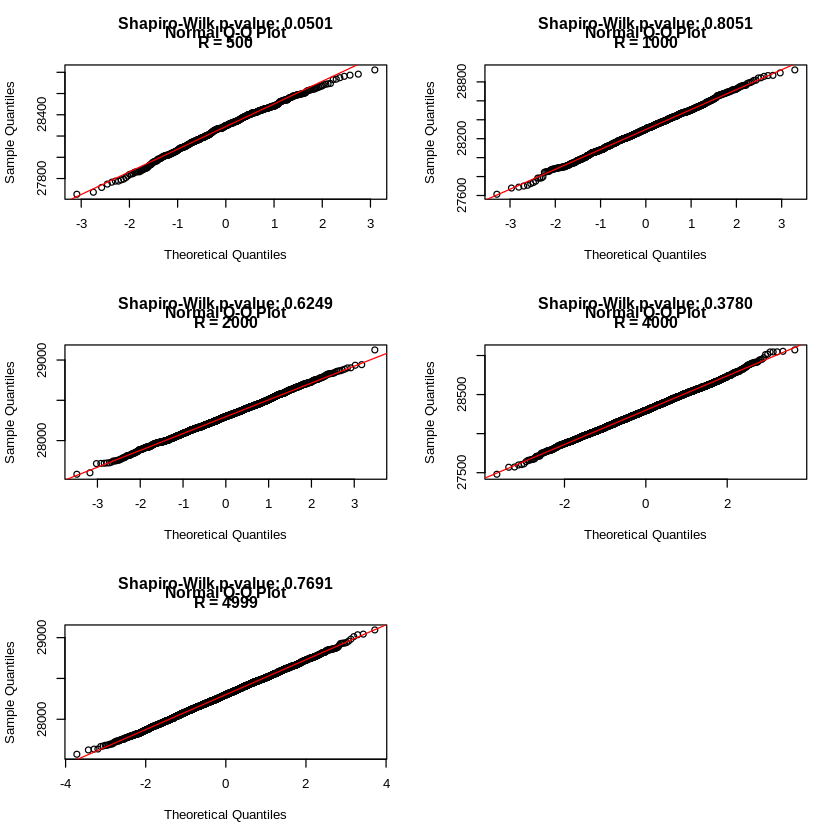

In [37]:
bootstrap_stat <- function(data, indices) {
    d <- data[indices]  # Selects a bootstrap sample
    mean(d)
}


library(boot)

# Bootstrap at different R values
set.seed(123)
results <- lapply(c(500, 1000, 2000, 4000, 4999), function(r) {
    boot(data = strat_sample$price, statistic = bootstrap_stat, R = r)
})

# Create an empty data frame to store the results
results_df <- data.frame(R = integer(), P_Value = numeric(), stringsAsFactors = FALSE)


par(mfrow = c(3, 2))

for (result in results) {
    # Extracting the bootstrap estimates
    estimates <- result$t

    # Q-Q Plot
    qqnorm(estimates)
    qqline(estimates, col = "red")

    # Conduct Shapiro-Wilk test and print results
    test <- shapiro.test(estimates)
    title(main = sprintf("Shapiro-Wilk p-value: %.4f\nR = %d", test$p.value, result$R))

    results_df <- rbind(results_df, data.frame(R = result$R, P_Value = test$p.value))


}




In [38]:
results_df

R,P_Value
<dbl>,<dbl>
500,0.05014392
1000,0.80507384
2000,0.62493643
4000,0.37796107
4999,0.76908527


In [39]:
options(repos = c(CRAN = "https://cran.rstudio.com/"))

install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




# Hypothesis Testing


## Hypothesis-1


**Null Hypothesis (H0):** The proportion of SUVs produced by car manufacturers in 2020 is the same as the proportion produced in 2021.

**Alternative Hypothesis (H1):** The proportion of SUVs produced by car manufacturers in 2020 is different from the proportion produced in 2021, indicating a shift in consumer demand towards larger vehicles.

### Filter the data for 2020 and 2021

In [43]:
library(ggplot2)
library(dplyr)
library(readxl)
library(tidyr)
library(broom)


# Convert the Date to a year format and prepare the data
strat_sample$year <- format(as.Date(strat_sample$date), "%Y")

# Filter the data to include only SUVs and calculate the counts
suv_counts <- strat_sample %>%
  filter(body_style == "SUV") %>%
  count(year, company)

# Calculate the total counts for each year and company across all body styles
total_counts <- strat_sample %>%
  count(year, company)

# Join the SUV counts with the total counts
suv_proportions <- suv_counts %>%
  left_join(total_counts, by = c("year", "company"), suffix = c("_SUV", "_Total")) %>%
  mutate(Proportion_SUV = n_SUV / n_Total)

# Prepare the data for visualization and paired t-test
suv_proportions_wide <- suv_proportions %>%
  select(company, year, Proportion_SUV) %>%
  pivot_wider(names_from = year, values_from = Proportion_SUV)




### Calculate the shapiro test for the data

In [44]:

# Calculate the differences between the two years for each company
suv_proportions_wide$differences <- suv_proportions_wide$`2021` - suv_proportions_wide$`2020`

# Perform the Shapiro-Wilk test for normality on these differences
normality_test_results <- shapiro.test(suv_proportions_wide$differences)

print(normality_test_results)



	Shapiro-Wilk normality test

data:  suv_proportions_wide$differences
W = 0.94087, p-value = 0.1409



Since the w value from the test results is close to 1, we can say that the data set is following normality.

Also, p-value is greater than the threshold of 0.05. So, we cannot reject the NULL hypothesis.


# A tibble: 1 × 8
  estimate statistic p.value parameter conf.low conf.high method     alternative
     <dbl>     <dbl>   <dbl>     <dbl>    <dbl>     <dbl> <chr>      <chr>      
1  -0.0260     -1.61   0.119        25  -0.0592   0.00720 Paired t-… two.sided  
Results of the Paired t-test:
Estimated Mean Difference:  -0.02597654 
Standard Deviation of Differences:  NA 
T-Value:  -1.612724 
Degrees of Freedom:  25 
P-Value:  0.1193583 
Confidence Interval:  -0.05915002 0.007196951 


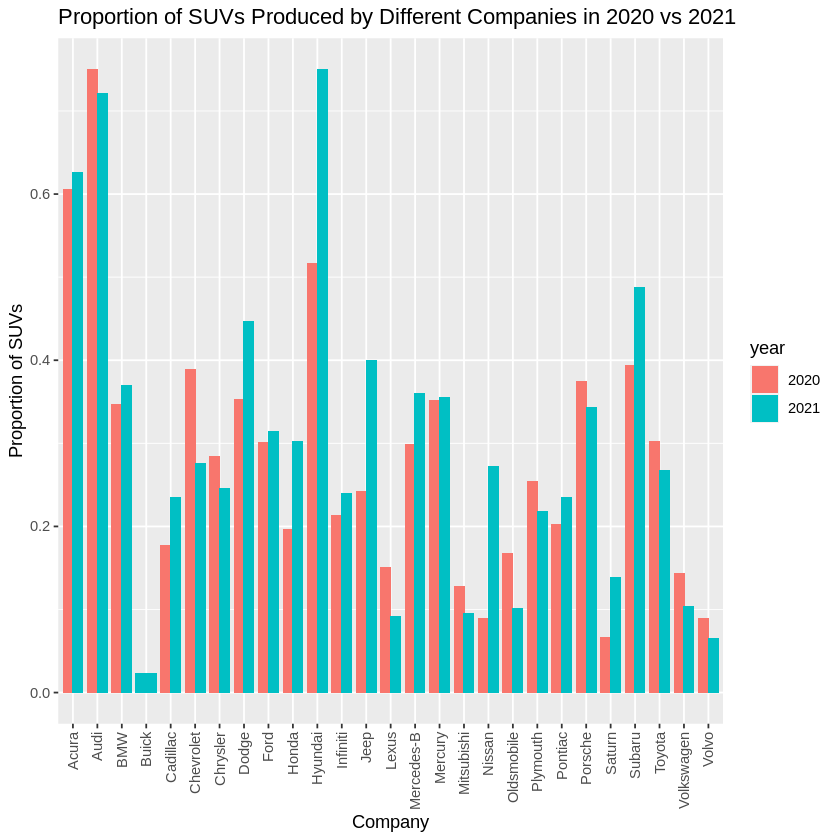

In [45]:
# Perform a paired sample t-test
t_test_results <- t.test(suv_proportions_wide$`2020`, suv_proportions_wide$`2021`, paired = TRUE)



print(glance(t_test_results))


ggplot(suv_proportions, aes(x = company, y = Proportion_SUV, fill = year)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  labs(x = "Company", y = "Proportion of SUVs",
       title = "Proportion of SUVs Produced by Different Companies in 2020 vs 2021") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))



# Print detailed t-test results
cat("Results of the Paired t-test:\n")
cat("Estimated Mean Difference: ", t_test_results$estimate, "\n")
cat("Standard Deviation of Differences: ", sd(suv_proportions_wide$`2020` - suv_proportions_wide$`2021`), "\n")
cat("T-Value: ", t_test_results$statistic, "\n")
cat("Degrees of Freedom: ", t_test_results$parameter, "\n")
cat("P-Value: ", t_test_results$p.value, "\n")
cat("Confidence Interval: ", t_test_results$conf.int, "\n")

In [46]:
suv_proportions_clean <- na.omit(suv_proportions_wide)
differences <-suv_proportions_clean$`2021`  - suv_proportions_clean$`2020`
mean_diff <- mean(differences)
sd_diff <- sd(differences)

n <- length(differences)

t_value <- mean_diff / (sd_diff / sqrt(n))
df <- n-1
p_value <- 2 * pt(-abs(t_value), df)  # two-tailed test

# Output the results
cat("Mean of differences:", mean_diff, "\n")
cat("Standard deviation of differences:", sd_diff, "\n")
cat("t-Value:", t_value, "\n")
cat("Degrees of freedom:", df, "\n")
cat("p-Value:", p_value, "\n")

Mean of differences: 0.02597654 
Standard deviation of differences: 0.08213114 
t-Value: 1.612724 
Degrees of freedom: 25 
p-Value: 0.1193583 



## Analysis:
* The difference in the proportions of SUVs made in 2020 and 2021 is 0.02597654 . So, the proportion of SUV's made in 2021 were more than 2020.

* T-value $= 1.612724$. So,we can conclude that the number of SUVs made in 2021 were more than in 2020.

* degrees of freedom = 25.

* A p-value $= 0.1193583$. So, there is $11.9\%$ chance of finding difference in proportions. Also, this value is greater than 0.05. So, the results are not statistically significant at the 5% level and we cannot reject NULL hypothesis.

  
* The 95% confidence interval $-0.05915002 \text{ to } 0.007196951$. So, we don't have enough evidence to reject the NULL hypothesis.

## Hypothesis Testing with Randomization

* Null Hypothesis (H0): There is no difference in car prices between manual and automatic transmissions.
* Alternative Hypothesis (H1): There is a difference in car prices between manual and automatic transmissions.

### Code

In [48]:

randomization_test <- function(group1, group2, num_permutations = 10000) {
  # Calculate the observed difference in means
  observed_diff <- abs(mean(group1) - mean(group2))

  # Combine the data from both groups
  combined_data <- c(group1, group2)
  len_group1 <- length(group1)

  # Perform permutations and calculate p-value
  p_value <- mean(sapply(1:num_permutations, function(i) {
    # Shuffle the combined data with replacement
    shuffled_indices <- sample.int(length(combined_data), replace = FALSE)

    # Split the shuffled data into new groups
    new_group1 <- combined_data[shuffled_indices[1:len_group1]]
    new_group2 <- combined_data[shuffled_indices[(len_group1 + 1):length(combined_data)]]

    # Calculate the difference in means for the permuted groups
    new_diff <- abs(mean(new_group1) - mean(new_group2))

    # Return 1 if the permuted difference is greater than or equal to the observed difference, 0 otherwise
    as.numeric(new_diff >= observed_diff)
  }))

  return(list(observed_diff = observed_diff, p_value = p_value))
}


library(dplyr)

set.seed(123)
# Filter data for 2020, both manual and automatic transmissions
data_2020_manual <- filter(strat_sample, format(date, "%Y") == "2020" & transmission == "Manual")
data_2020_auto <- filter(strat_sample, format(date, "%Y") == "2020" & transmission == "Auto")

data_2021_manual <- filter(strat_sample, format(date, "%Y") == "2021" & transmission == "Manual")
data_2021_auto <- filter(strat_sample, format(date, "%Y") == "2021" & transmission == "Auto")

# Extracting the 'Price ($)' column for the randomization test
price_2020_manual <- data_2020_manual$price
price_2020_auto <- data_2020_auto$price


price_2021_manual <- data_2021_manual$price
price_2021_auto <- data_2021_auto$price


# Perform the randomization test
results <- randomization_test(price_2020_manual, price_2020_auto)
print(results)


results <- randomization_test(price_2021_manual, price_2021_auto)
print(results)



$observed_diff
[1] 2034.726

$p_value
[1] 0.002

$observed_diff
[1] 630.0765

$p_value
[1] 0.2808



## Analysis

| Year | Observed Difference | p-value | Significance Level | Conclusion |
|------|---------------------|---------|--------------------|------------|
| 2020 | `$2034.726`             | 0.002   | 0.05               | reject null hypothesis |
| 2021 | `$630.0765`          | 0.2808  | 0.05               | No evidence to reject null hypothesis |


For year 2020: There is evidence of a pricing difference between transmission types, so we can reject the NULL hypothesis.

For year 2021, there is no enough evidence to reject the null hypothesis.

## Confidence Intervals for Hypothesis with Randomization Test

In [50]:
randomization_test <- function(group1, group2, num_permutations = 10000, conf_level = 0.95) {
  observed_diff <- mean(group1) - mean(group2)

  # Combine the data from both groups
  combined_data <- c(group1, group2)
  len_group1 <- length(group1)

  # Perform permutations
  permutation_diffs <- replicate(num_permutations, {
    # Shuffle the combined data without replacement
    shuffled_data <- sample(combined_data, length(combined_data))

    # Split the shuffled data into new groups
    new_group1 <- shuffled_data[1:len_group1]
    new_group2 <- shuffled_data[(len_group1 + 1):length(combined_data)]

    # Calculate the difference in means for the permuted groups
    mean(new_group1) - mean(new_group2)
  })

  # Calculate p-value
  p_value <- mean(abs(permutation_diffs) >= abs(observed_diff))

  # Calculate confidence interval
  lower <- quantile(permutation_diffs, (1 - conf_level) / 2)
  upper <- quantile(permutation_diffs, 1 - (1 - conf_level) / 2)

  return(list(observed_diff = observed_diff, p_value = p_value,
              conf_int = c(lower, upper), permutation_diffs = permutation_diffs))
}

# Use the function for 2020 data
results_2020 <- randomization_test(price_2020_manual, price_2020_auto)


# Use the function for 2021 data
results_2021 <- randomization_test(price_2021_manual, price_2021_auto)



[1] -2034.726
[1] 630.0765


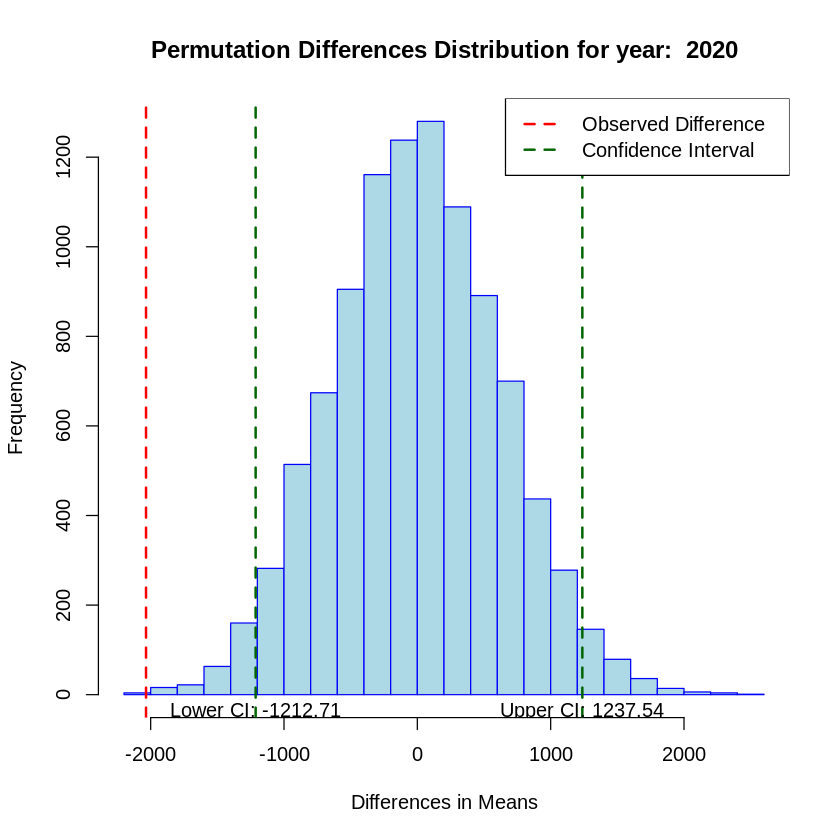

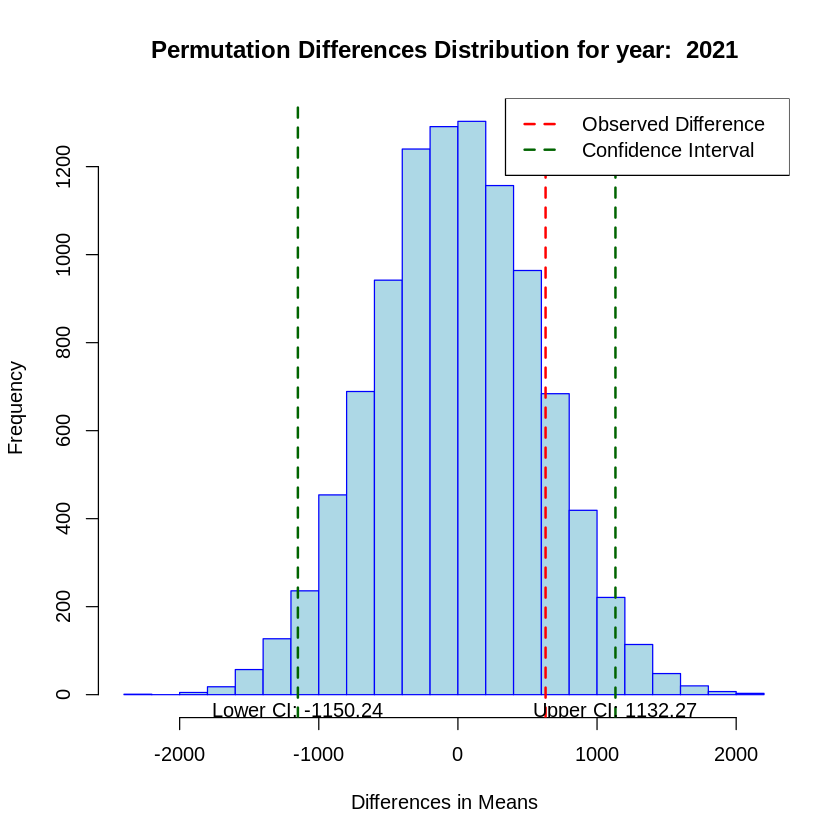

In [52]:

plot_results <- function(results, year) {
  print(results$observed_diff)
  hist(results$permutation_diffs, breaks = 30, main = paste("Permutation Differences Distribution for year: ", year),
       xlab = "Differences in Means", col = "lightblue", border = "blue")
  abline(v = results$observed_diff, col = "red", lwd = 2, lty = 2)
  abline(v = results$conf_int[1], col = "darkgreen", lwd = 2, lty = 2)
  abline(v = results$conf_int[2], col = "darkgreen", lwd = 2, lty = 2)
  legend("topright", legend = c("Observed Difference", "Confidence Interval"),
         col = c("red", "darkgreen"), lwd = 2, lty = 2)

  # Add text annotations for the CI limits
  ci_y_position <- max(table(results$permutation_diffs)) # Finds a suitable y position based on the frequency
  text(results$conf_int[1], ci_y_position, labels = paste("Lower CI:", round(results$conf_int[1], 2)), pos = 1)
  text(results$conf_int[2], ci_y_position, labels = paste("Upper CI:", round(results$conf_int[2], 2)), pos = 1)
}


plot_results(results_2020, 2020)
plot_results(results_2021, 2021)


## Hypothesis Testing-3

Null Hypothesis (H0): There is no significant difference in the average annual income of customers between genders.

Alternative Hypothesis (H1): There is a significant difference in the average annual income of customers between genders.

In [54]:
# Function to calculate difference in means
bootstrap_diff <- function(data, indices) {
  sample_data <- data[indices,]
  mean_male <- mean(sample_data$annual_income[sample_data$gender == 'Male'])
  mean_female <- mean(sample_data$annual_income[sample_data$gender == 'Female'])
  mean_male - mean_female
}

# Bootstrap for difference in means
set.seed(123)
boot_results_diff <- boot(data = strat_sample, statistic = bootstrap_diff, R = 1000)

# Calculate and print the 95% Confidence Interval
boot_ci_diff <- boot.ci(boot_results_diff, type = "perc")
cat("Bootstrap 95% CI for difference in means:", boot_ci_diff$percent[4], "to", boot_ci_diff$percent[5], "\n")


Bootstrap 95% CI for difference in means: 4571.093 to 105745.9 


In [55]:
library(ggplot2)

# Calculate mean and standard deviation of the bootstrap estimates
mean_diff <- mean(boot_results_diff$t)
sd_diff <- sd(boot_results_diff$t)
lower_ci <- boot_ci_diff$percent[4]
upper_ci <- boot_ci_diff$percent[5]

# Create a data frame for plotting
bootstrap_estimates <- data.frame(Estimates = boot_results_diff$t)


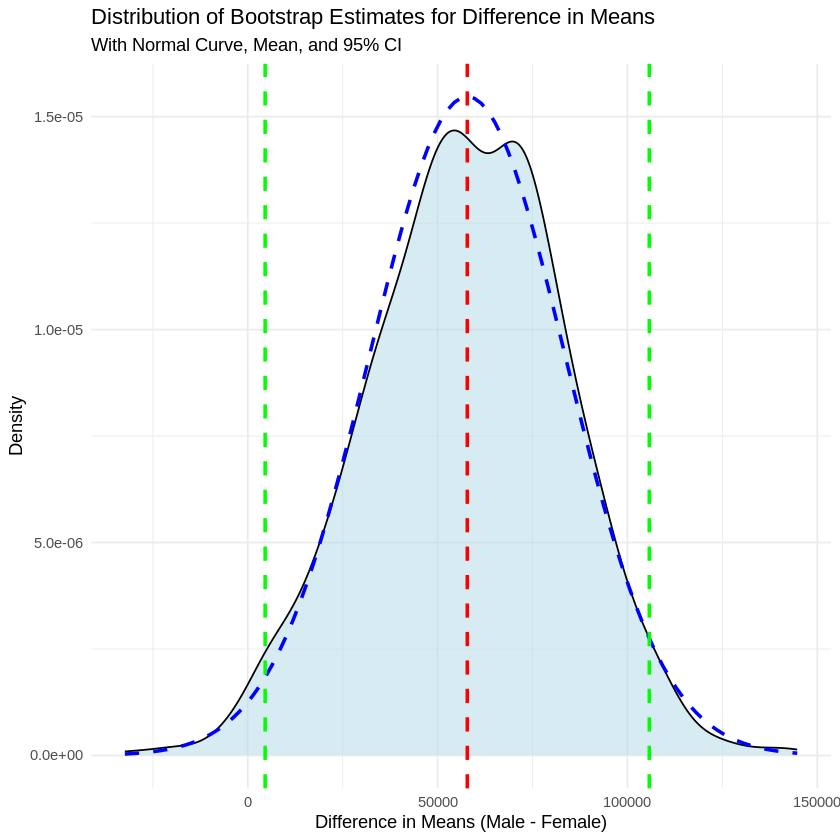

In [56]:
# Plotting the bootstrap estimates as a density plot
ggplot(bootstrap_estimates, aes(x = Estimates)) +
  geom_density(fill = "lightblue", alpha = 0.5) +
  stat_function(fun = dnorm, args = list(mean = mean_diff, sd = sd_diff),
                color = "blue", linetype = "dashed", size = 1) +
  geom_vline(xintercept = mean_diff, color = "red", linetype = "dashed", size = 1) +
  geom_vline(xintercept = lower_ci, color = "green", linetype = "dashed", size = 1) +
  geom_vline(xintercept = upper_ci, color = "green", linetype = "dashed", size = 1) +
  labs(title = "Distribution of Bootstrap Estimates for Difference in Means",
       subtitle = "With Normal Curve, Mean, and 95% CI",
       x = "Difference in Means (Male - Female)", y = "Density") +
  theme_minimal()


In [57]:
set.seed(123)

# Step 1: Extract income data for each gender
male_income <-strat_sample$annual_income[strat_sample$gender == 'Male']
female_income <-strat_sample$annual_income[strat_sample$gender == 'Female']


# Take a random sample from each gender group
sample_male_income <- sample(male_income, size = 4999, replace = TRUE)
sample_female_income <- sample(female_income, size = 4999, replace = TRUE)



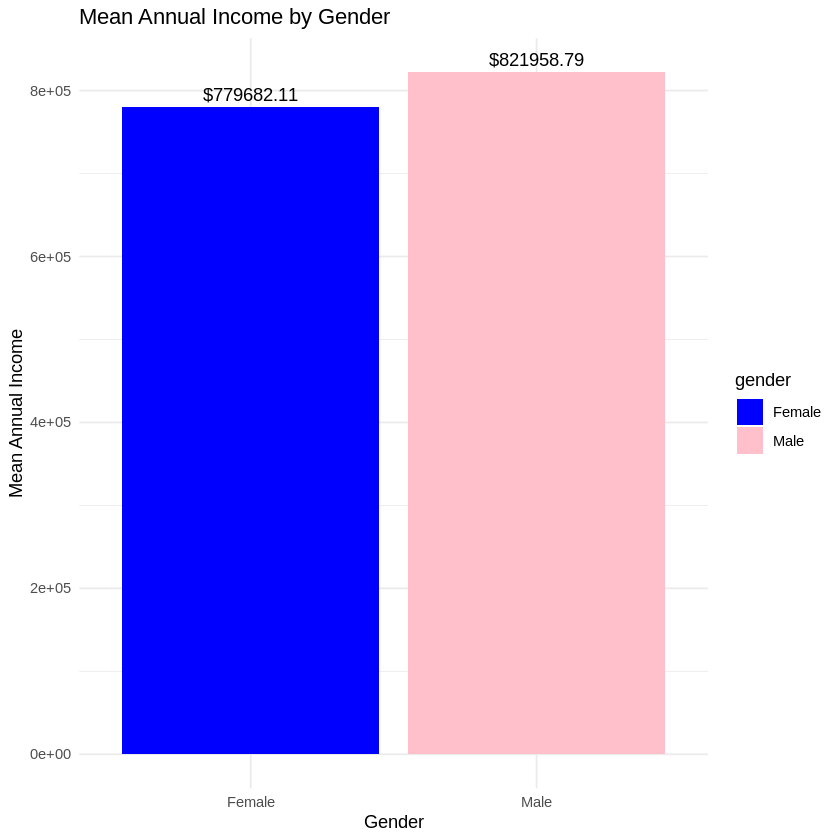

In [59]:
# Create a data frame for bar plots
barplot_data <- data.frame(
  gender = c("Male", "Female"),
  mean_income = c(mean(sample_male_income), mean(sample_female_income)),
  median_income = c(median(sample_male_income), median(sample_female_income))
)

# Create bar plots
library(ggplot2)
ggplot(barplot_data, aes(x = gender, y = mean_income, fill = gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = sprintf("$%.2f", mean_income)), vjust = -0.5, position = position_dodge(width = 0.9)) +
  labs(title = "Mean Annual Income by Gender",
       x = "Gender", y = "Mean Annual Income") +
  scale_fill_manual(values = c("blue", "pink")) +
  theme_minimal()



# Regression Modelling

## Simple Linear Regression

### Model Fitting and Predicting

In [63]:

# Set seed for reproducibility
set.seed(123)

# Generate random indices for splitting data
train_indices <- sample(nrow(strat_sample), 0.8 * nrow(strat_sample))

# Create training and testing datasets
train_data <- strat_sample[train_indices, ]
test_data <- strat_sample[-train_indices, ]


#  linear regression model on the training data
model <- lm(price ~ annual_income, data = train_data)


In [64]:
# Calculate the fitted values
fitted_values <- fitted(model)
# Calculate the fitted values

# Calculate the residuals using Pearson method
residuals_pearson <- resid(model, type = "pearson")

n <- min(length(fitted_values), length(residuals_pearson))
strat_sample_subset <- strat_sample[1:n, ]

result_df <- data.frame(yhat = fitted_values[1:n], r = residuals_pearson[1:n], y = strat_sample_subset$annual_income)



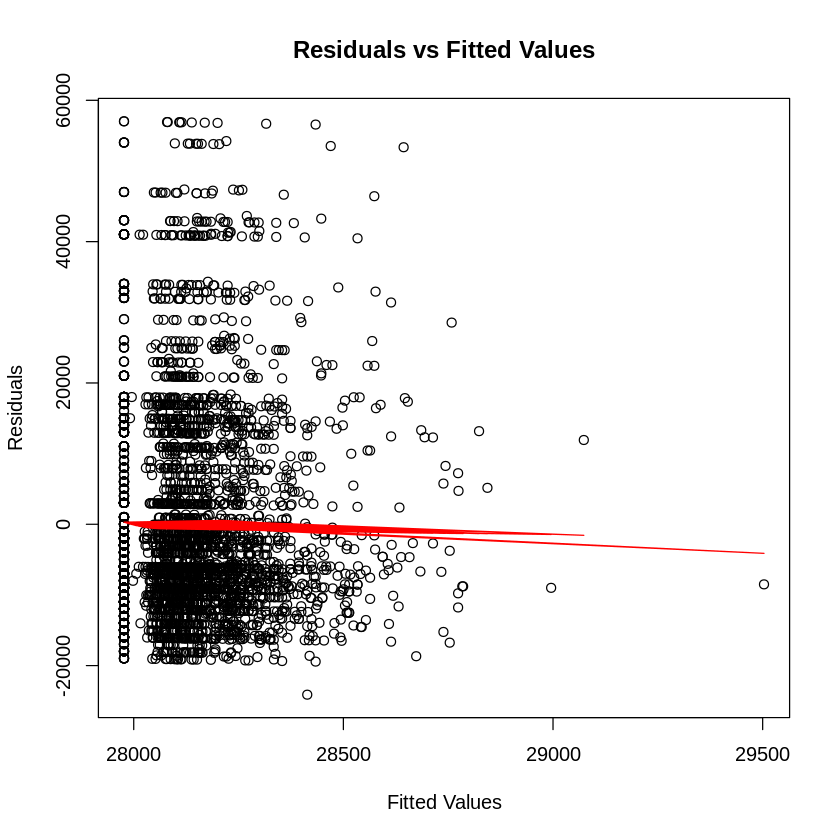

In [65]:
# Plot residuals vs fitted values
plot(result_df$yhat, result_df$r,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values")

# Add a smooth line using LOESS
smooth_line <- loess(result_df$r ~ result_df$yhat)
lines(result_df$yhat, smooth_line$fitted, col = "red", lwd = 1)


### Simple Linear Regression Analysis:

* Linearity:
In this graph, the red line should be horizontal and around zero if the relationship is linear.
  * The red line in this graph is relatively flat, suggesting that the linearity assumption may not be severely violated.
* Homoscedasticity: This means, residuals have constant variance at all levels of fitted values. If this holds, then the spread should be roughly same across all the fitted values.
  * Here the graph clearly indicates violation of Homoscedasticity. This is due to the fact that the variance of the residuals is not constant.

* Outliers: There are few points that are far away from the rest of the points particularly at teh upper and lower ends of the residuals range. These points suggests that outliers exists in the data

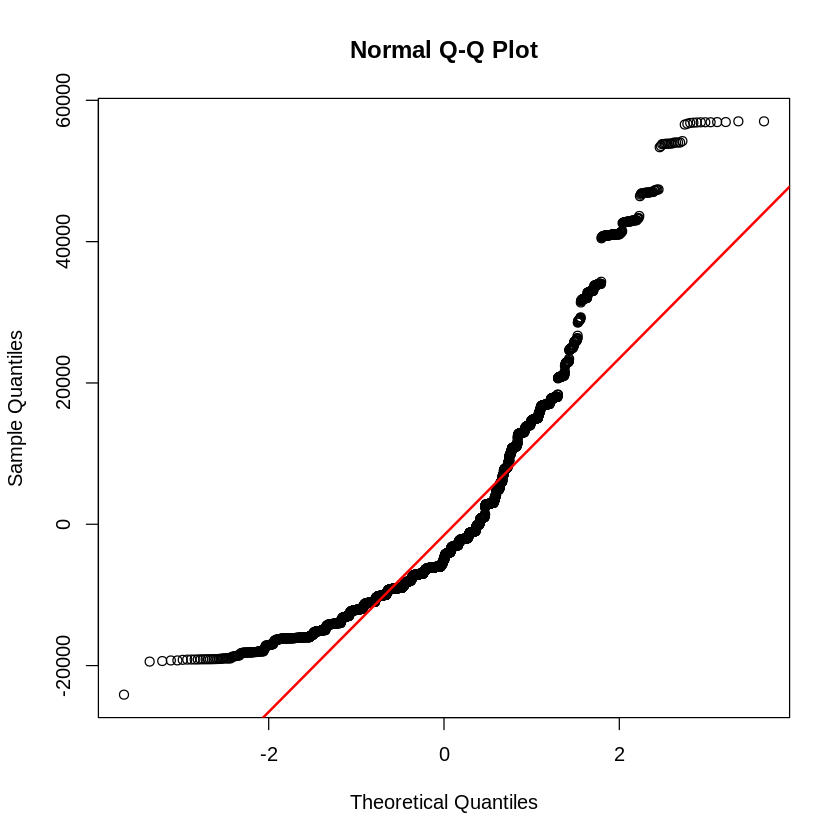

In [66]:
qqnorm(residuals_pearson)
qqline(residuals_pearson, col = "red", lwd = 2)

Most of the points appear to follow the red line closely. This suggests that the residuals are approximately normally distributed in the given range.

However, there are some points deviating from the red line, particularly at the tails of the graph. This indicates that there may be some skewness in the dataset.

### Applying Log Transformation to the datapoints


In [68]:
# Build the linear regression model on the training data
model_log <- lm(log_price ~ log_annual_income, data = train_data)

In [69]:
# Calculate the fitted values
fitted_values <- fitted(model_log)

# Calculate the residuals using Pearson method
residuals_pearson <- resid(model_log, type = "pearson")

n <- min(length(fitted_values), length(residuals_pearson))
strat_sample_subset <- strat_sample[1:n, ]

# Create the dataframe with the subsetted 'annual_income'
result_df <- data.frame(yhat = fitted_values[1:n], r = residuals_pearson[1:n], y = strat_sample_subset$log_annual_income)

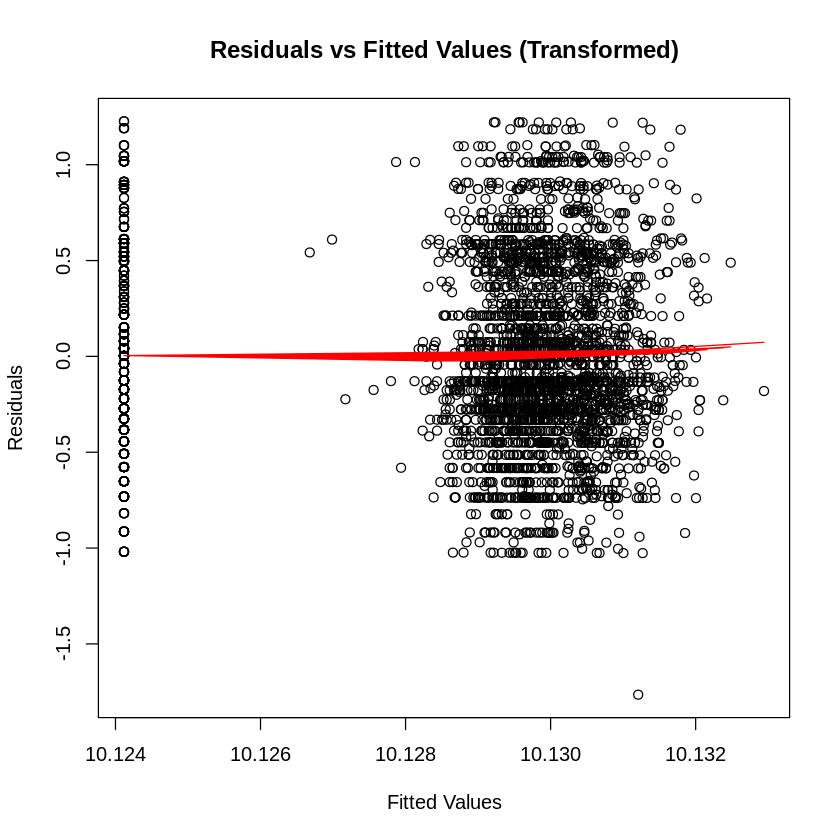

In [70]:
# Plot residuals vs fitted values
plot(result_df$yhat, result_df$r,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values (Transformed)")

# Add a smooth line using LOESS
smooth_line <- loess(result_df$r ~ result_df$yhat)
lines(result_df$yhat, smooth_line$fitted, col = "red", lwd = 1)


### Analysis after applying log transformation:
* **Linearity**: The red line in this revised models graph is relatively flat and remained close to zero. So, after applying the log transformation, there exists a linear relation between the predictor and target variables.

* **Homoscedasticity**: The spread of residuals in this plot appears consistent across the range of fitted values.So, we can conclude that the variance of the residuals may now be constant.

*Outliers: while there are still some potential outliers that are far above or below the rest of the data.

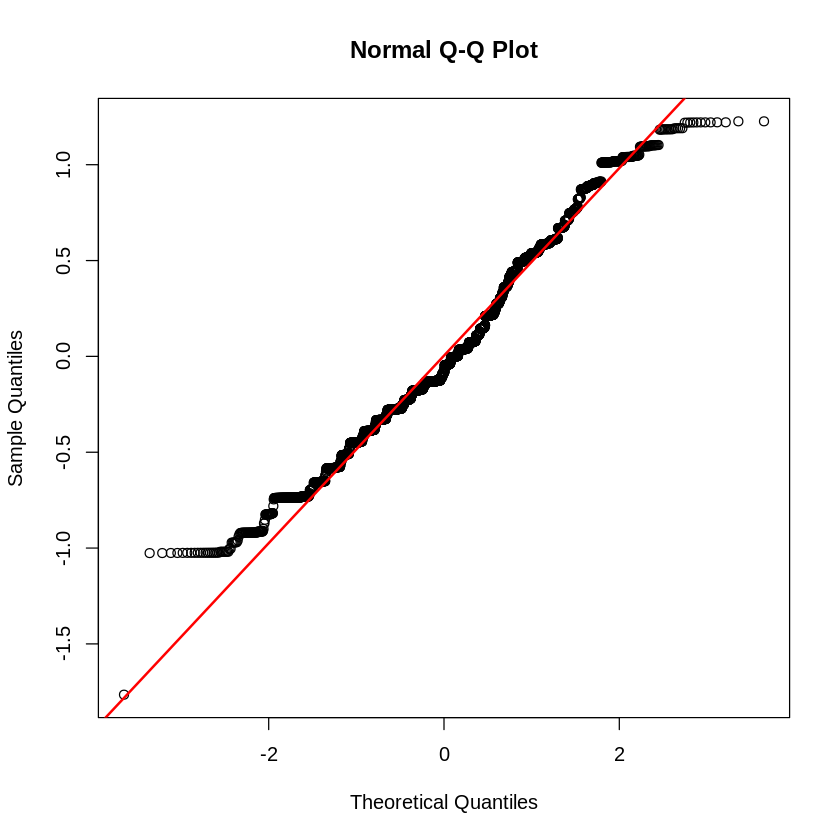

In [71]:
# Generate Q-Q plot for the residuals
qqnorm(residuals_pearson)
qqline(residuals_pearson, col = "red", lwd = 2)


### Normality Test Analysis:
Most of the points appear to follow the red line closely. This suggests that the residuals are approximately normally distributed in the given range.

However, there are some points deviating from the red line, particularly at the tails of the graph. This indicates that there may be some skewness in the dataset.

#### Predictions:

```
# This is formatted as code
```



In [72]:
# Generate predictions for the training data
set.seed(123)
train_predictions <- predict(model_log, train_data)

test_predictions <- predict(model_log, test_data)

# Calculate the RMSE for the training data
train_rmse <- sqrt(mean((train_data$log_price - train_predictions)^2))

# Calculate the RMSE for the test data
test_rmse <- sqrt(mean((test_data$log_price - test_predictions)^2))

# Calculate R-Squared for the training data
train_r_squared <- summary(model_log)$r.squared

# Calculate Adjusted R-Squared for the training data
train_adj_r_squared <- summary(model_log)$adj.r.squared

# Output the metrics
print(paste("Training RMSE:", train_rmse))
print(paste("Test RMSE:", test_rmse))
print(paste("Training R-Squared:", train_r_squared))
print(paste("Training Adjusted R-Squared:", train_adj_r_squared))




[1] "Training RMSE: 0.471890882843725"
[1] "Test RMSE: 0.48873131209821"
[1] "Training R-Squared: 2.86040841328604e-05"
[1] "Training Adjusted R-Squared: -0.0002330315505914"


### Predictions:


| Metric                    | Value                 |
|---------------------------|-----------------------|
| Training RMSE             | 0.471890882843725     |
| Test RMSE                 | 0.48873131209821      |
| Training R-Squared        | 0.0000286040841328604 |
| Training Adjusted R-Squared | -0.0002330315505914 |

* The training Root Mean Squared Error (RMSE) gives the extent to which the model's predictions deviate from the actual values within the training dataset. Here, it approximates 0.472, suggesting an average deviation of roughly 0.472 units.

* The test RMSE, conversely, evaluates the model's performance on previously unseen data, typically drawn from a validation or test dataset. In this instance, it stands at approximately 0.489, indicating a comparable predictive error level to that observed in the training data. This suggests a degree of generalizability of the model's performance to novel data instances.

* The training R-squared metric quantifies the proportion of variance in the dependent variable, explained by the independent variables within the model. Here, the value is relatively small around 0.0000286. So this suggests that the model explains only a minute fraction of the variance present in the training dataset

* The adjusted R-squared is enhanced R-squared value which check for the number of predictors effect on the model. Here, it's close to zero, roughly -0.00023. This means even when we consider the number of features, the model's ability to explain things is very weak or even negative.

## Multiple Linear Regression

In [74]:
library(dplyr)

strat_sample <- strat_sample %>%
  select(
    -dealer_no, -age, -year, -month, -day,
    -price_scaled, -annual_income_scaled,
    -log_price, -log_annual_income, -sqrt_price, -sqrt_annual_income
  )


In [75]:
names(strat_sample)

[1] "date"          "gender"        "annual_income" "dealer_name"  
 [5] "company"       "model"         "engine"        "transmission" 
 [9] "color"         "price"         "body_style"    "dealer_region"

### Creating Dummies for categorical variables

In [76]:
# Load the necessary libraries
library(caret)
library(dplyr)

# convert the necessary columns to factors
categorical_columns <- c('gender', 'company', 'model', 'engine', 'transmission', 'color', 'body_style', 'dealer_region')
strat_sample[categorical_columns] <- lapply(strat_sample[categorical_columns], factor)

# Using model.matrix to create dummy variables for all the categorical variables and omitting the intercept
dummy_variables_matrix <- model.matrix(~ gender + company + model + engine + transmission + color + body_style + dealer_region - 1, data=strat_sample)

# Convert the matrix to a data frame
dummy_variables_df <- as.data.frame(dummy_variables_matrix)

# Combine the dummy variables with the original data frame
strat_sample_combined <- cbind(strat_sample, dummy_variables_df)

# Remove the original categorical columns to avoid redundancy
strat_sample_final <- strat_sample_combined[, !(names(strat_sample_combined) %in% categorical_columns)]

# Split the data into training and testing sets
set.seed(123)
training_indices <- createDataPartition(strat_sample_final$price, p = 0.8, list = FALSE)
train_data <- strat_sample_final[training_indices, ]
test_data <- strat_sample_final[-training_indices, ]

# Display the first two rows of the training dataset to confirm changes
head(train_data, 2)


date,annual_income,dealer_name,price,genderFemale,genderMale,companyAudi,companyBMW,companyBuick,companyCadillac,⋯,body_styleHatchback,body_stylePassenger,body_styleSedan,body_styleSUV,dealer_regionAustin,dealer_regionGreenville,dealer_regionJanesville,dealer_regionMiddletown,dealer_regionPasco,dealer_regionScottsdale
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-08-01,1480000,Nebo Chevrolet,17000,0,1,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
2020-09-21,950000,Ryder Truck Rental and Leasing,17000,0,1,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0


### Model Fitting

In [78]:
lm_dummies = lm(price ~ . ,  data = train_data)


In [79]:

# Calculate the fitted values
fitted_values <- fitted(lm_dummies)

# Calculate the residuals using Pearson method
residuals_pearson <- resid(lm_dummies, type = "pearson")


lm_dummies_result_df = data.frame(yhat=fitted_values, r2 = residuals_pearson, y = train_data$price)


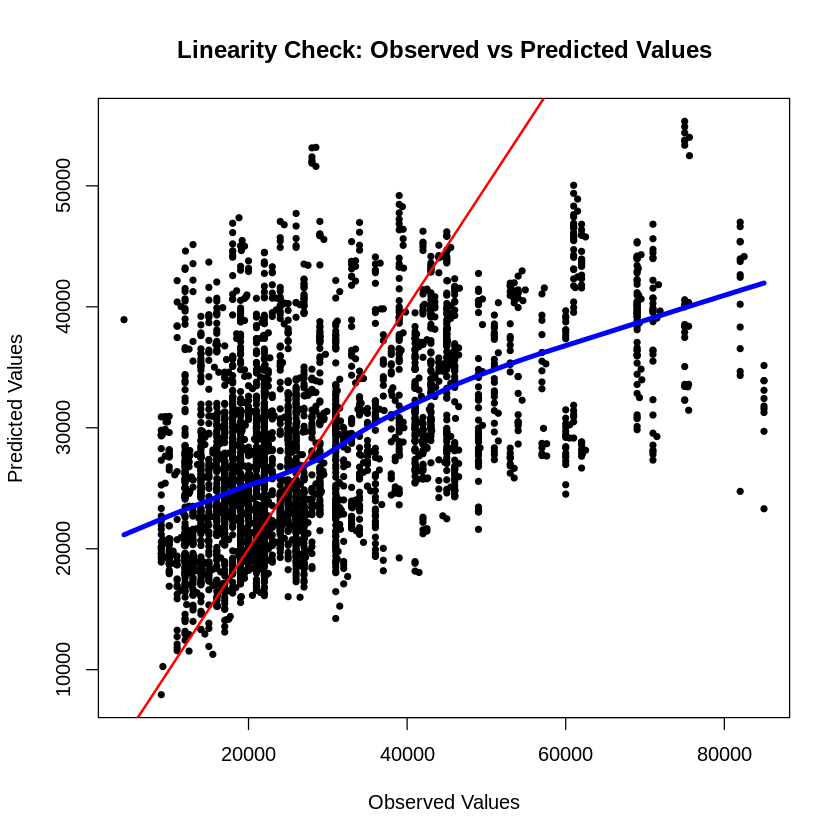

In [80]:

# Plotting the observed values against the fitted values
plot(lm_dummies_result_df$y, lm_dummies_result_df$yhat,
     xlab = "Observed Values", ylab = "Predicted Values",
     main = "Linearity Check: Observed vs Predicted Values",
     pch = 20)

# Adding a smooth line
lines(lowess(lm_dummies_result_df$y, lm_dummies_result_df$yhat), col = "blue", lwd=4)

# Adding y=x line
abline(a = 0, b = 1, col = "red", lwd=2)

### Analysis:
### Linearity Check Analysis:

* If the predictions are perfect, all points would lie on the blue line, indicating predicted value is equal to the actual value.

* The red line illustrates how the model's predictions compare to the blue line of perfect fit. In an ideal scenario, the red and blue lines would be superimposed.

* The spread of points around the red line indicates the variance of the residuals. Ideally, these should be randomly distributed around the red line, with no clear pattern.


### Observations:

* The red line deviates from the blue line, particularly as the observed values increase, indicating that the model may underpredict for lower values and overpredict for higher values.


* There's a considerable spread of points, which becomes
 more pronounced as the value of the prediction increases. This suggests heteroscedasticity—non-constant variance of the errors, which violates one of the linear regression assumptions.

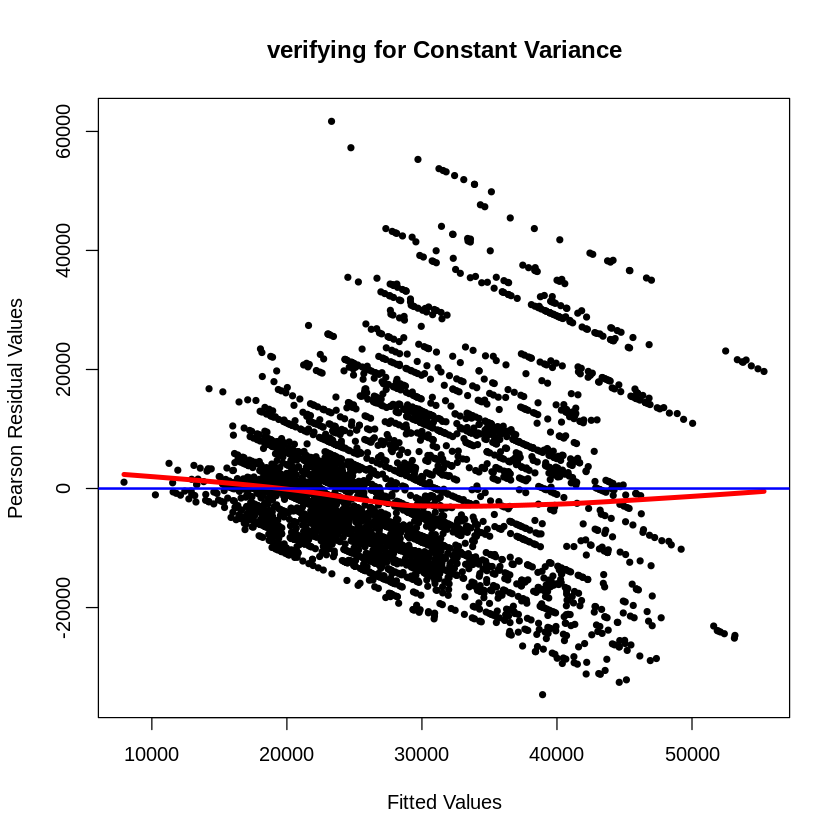

In [81]:
# Plotting the fitted values against the residuals
plot(lm_dummies_result_df$yhat, lm_dummies_result_df$r2,
     xlab = "Fitted Values", ylab = "Pearson Residual Values",
     main = "verifying for Constant Variance",
     pch = 20)

# Add a smooth line to the plot
lines(lowess(lm_dummies_result_df$yhat, lm_dummies_result_df$r2), col = "red", lwd=4)

# Add a horizontal line at y=0
abline(h = 0, col = "blue", lwd=2)

### Homoscedasticity Graph Analysis:

 * The blue line at zero is the reference line where residuals would lie if the predicted values were perfect. Most residuals should cluster around this line without any systematic pattern.

*  The red line is smoothing line that helps visualize the average trend of the residuals. It should be horizontal at zero if the model's residuals are homoscedastic.

* Here, the plot shows a clear pattern where the spread of residuals increases with the fitted values, indicating heteroscedasticity.





### Normality Check

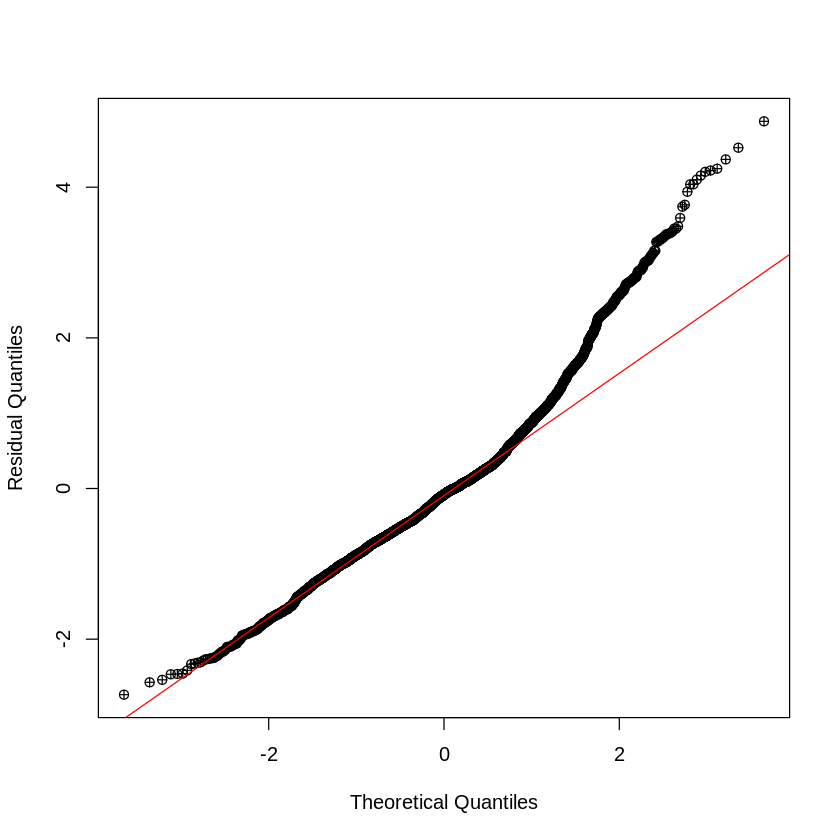

In [83]:
# Generate a Q-Q plot
qqnorm((lm_dummies_result_df$r2 - mean(lm_dummies_result_df$r2)) / sd(lm_dummies_result_df$r2),
       main = "", xlab = "Theoretical Quantiles", ylab = "Residual Quantiles", pch = 10)

# Add a Q-Q line
qqline((lm_dummies_result_df$r2 - mean(lm_dummies_result_df$r2)) / sd(lm_dummies_result_df$r2), col = "red")

### Normality check Analysis with Q-Q plot.

Most of the points appear to follow the red line closely from -2 to 2. This suggests that the residuals are approximately normally distributed in the given range.

However, there are some points deviating from the red line, particularly at  the upper tail (right side) shows a curve upward, indicating that the residuals have heavier tails than the normal distribution—this is evidence of positive skewness.

### Predictions on Test Data

In [84]:

library(Metrics)

# predictions on the test data
predictions <- predict(lm_dummies, test_data)

# Calculate the RMSE between the actual and predicted values for the test data
rmse_value <- rmse(test_data$price, predictions)

# Calculate R-Squared value on the test data
r_squared <- cor(test_data$price, predictions)^2

# Calculate the residuals on the test data
test_residuals <- test_data$price - predictions

# Create a dataframe with actual vs predicted values for further analysis or plotting
results_df <- data.frame(Actual = test_data$price, Predicted = predictions, Residuals = test_residuals)

# Output the RMSE and R-Squared values
print(paste("RMSE on Test Data:", rmse_value))
print(paste("R-Squared on Test Data:", r_squared))




[1] "RMSE on Test Data: 13351.1224685417"
[1] "R-Squared on Test Data: 0.215355822502314"


The R-squared value on the test data indicates the proportion of variance in the car prices that is explained by the predictor variables (gender, company, model, engine, transmission, color, body style, dealer region)in the model.

  * A value of 21.54% variability in the car prices can be explained by the model. If the R-squared is higher then,  the model explans better variability in the data.

The Root Mean Squared Error (RMSE) measures the average deviation between the actual car prices and the predicted car prices on the test data. Here, the model's predictions are about 13,351 units away from the actual data points.

### MLR With Transformations

In [86]:
set.seed(123)
sqrt_lm = lm(sqrt(price) ~ . ,  data = train_data)


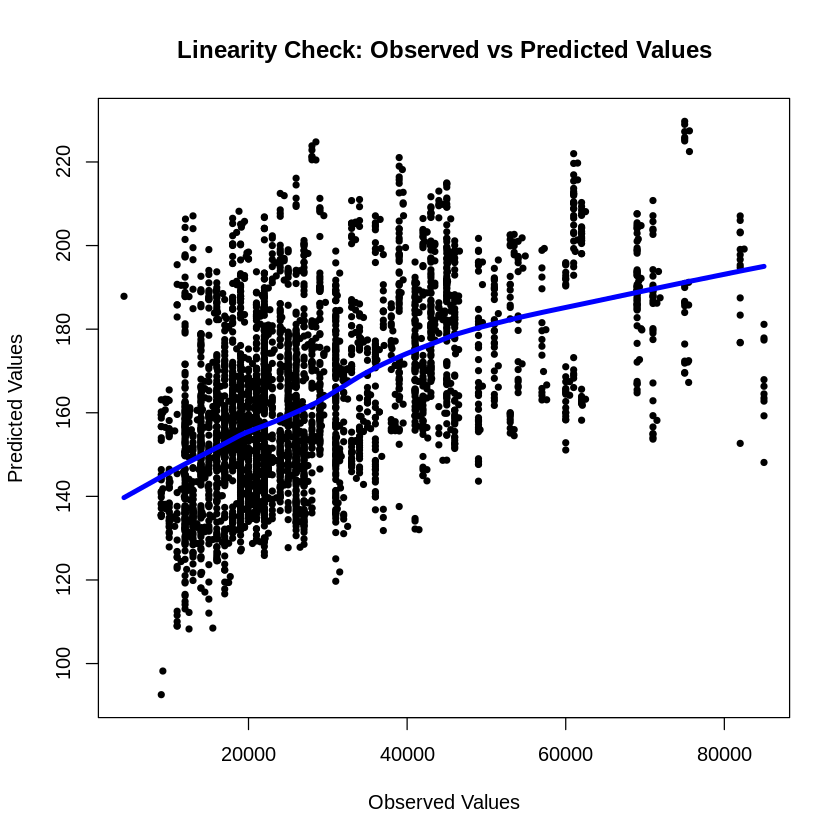

In [87]:

# Calculate the fitted values
fitted_values <- fitted(sqrt_lm)

# Calculate the residuals using Pearson method
residuals_pearson <- resid(sqrt_lm, type = "pearson")


sqrt_lm_result_df = data.frame(yhat=fitted_values, r2 = residuals_pearson, y = train_data$price)


# Plotting the observed values against the fitted values
plot(sqrt_lm_result_df$y, sqrt_lm_result_df$yhat,
     xlab = "Observed Values", ylab = "Predicted Values",
     main = "Linearity Check: Observed vs Predicted Values",
     pch = 20)

# Adding a smooth line
lines(lowess(sqrt_lm_result_df$y, sqrt_lm_result_df$yhat), col = "blue", lwd=4)

# Adding y=x line
abline(a = 0, b = 1, col = "red", lwd=4)

### Linearity graph Interpretation:

If the model's predictions are accurate, we would expect this line to be at approximately a 45-degree angle, indicating that predicted values match observed values.

* The blue line suggests a general linear trend, indicating that as the observed values increase, so do the predicted values.

* The linearity assumption appears to be somewhat upheld, but there is a noticeable deviation from perfect linearity, especially at the extremes of the observed value range.

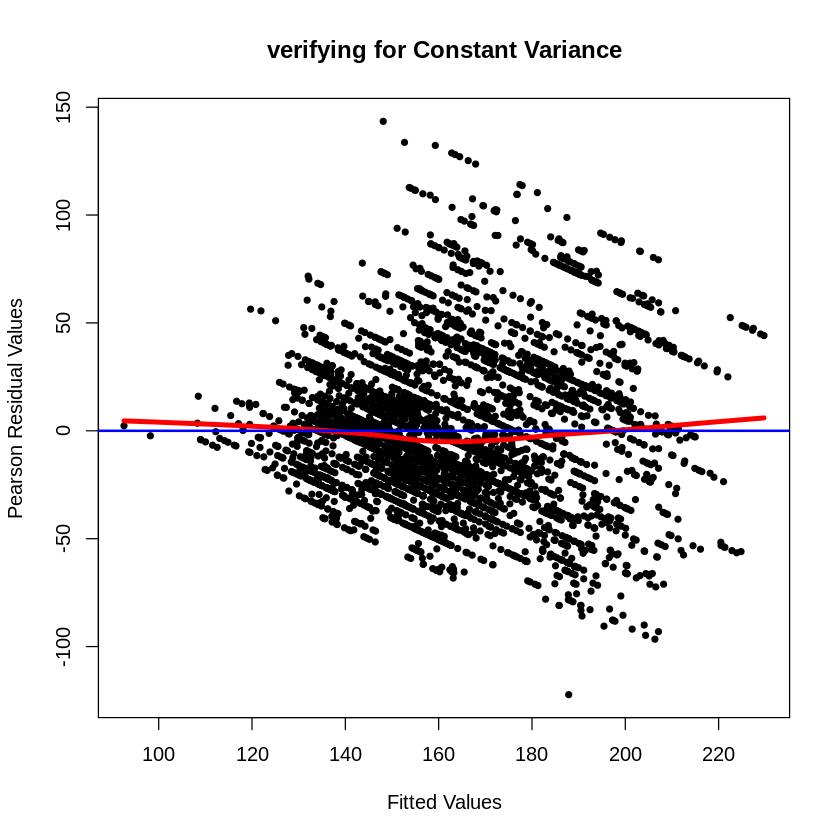

In [88]:
# Plotting the fitted values against the residuals
plot(sqrt_lm_result_df$yhat, sqrt_lm_result_df$r2,
     xlab = "Fitted Values", ylab = "Pearson Residual Values",
     main = "verifying for Constant Variance",
     pch = 20)

# Add a smooth line to the plot
lines(lowess(sqrt_lm_result_df$yhat, sqrt_lm_result_df$r2), col = "red", lwd=4)

# Add a horizontal line at y=0
abline(h = 0, col = "blue", lwd=2)

In [89]:
# Load the car package
if (!require(car)) {
  install.packages("car")
  library(car)
}


fitted_values <- fitted(sqrt_lm)
# Create a factor by cutting the fitted values into intervals
factor_fitted <- cut(fitted_values, breaks=quantile(fitted_values, probs=0:4/4), include.lowest=TRUE, labels=FALSE)

# Then use the factor to group your data in Levene's test
leveneTest(residuals(sqrt_lm), factor_fitted)



Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘car’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:boot’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


Warning message in leveneTest.default(residuals(sqrt_lm), factor_fitted):
“factor_fitted coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,149.0234,2.481717e-91
,3822,NA,NA


### Heteroscedasticity Test:

Mean Line (Blue): It serves as a reference to show whether, on average, the residuals are centered around zero.

LOESS Line (Red): The red LOESS line indicates the local trend of the residuals. It should be relatively flat and close to the mean line if the residuals are randomly distributed with constant variance.

The red line exhibits a non-linear pattern, deviating from the mean line as fitted values changes.

* The spread of residuals appears to increase with the fitted values, suggesting the presence of heteroscedasticity. This means that the variance of the error terms is not constant across the range of fitted values.

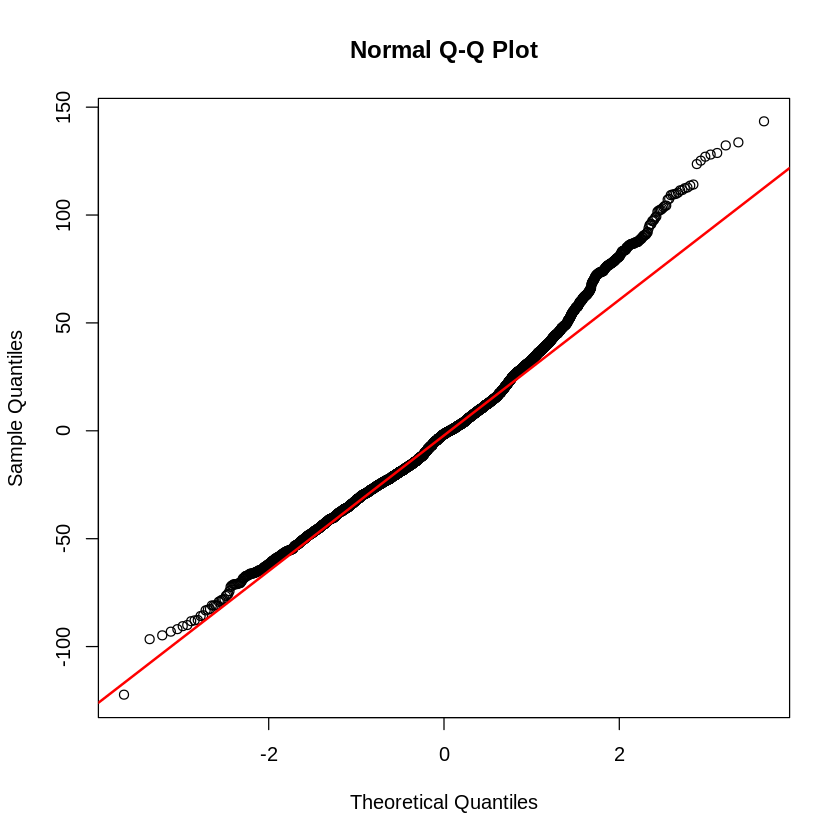

In [90]:
# Normality check
# Generate a Q-Q plot
qqnorm(residuals_pearson)
qqline(residuals_pearson, col = "red", lwd = 2)


In [91]:
shapiro.test(residuals_pearson)


	Shapiro-Wilk normality test

data:  residuals_pearson
W = 0.98358, p-value < 2.2e-16


with a p-value < 2.2e-16, the error terms are not following normality.

### Durbin-Watson Test

In [92]:
# Install and load the lmtest package.
if (!require(lmtest)) {
    install.packages("lmtest")
    library(lmtest)
}

# Perform the Durbin-Watson test to check for autocorrelation in residuals
dw_test <- durbinWatsonTest(sqrt_lm)

print(dw_test)


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




 lag Autocorrelation D-W Statistic p-value
   1   -0.0007338777      2.001388   0.658
 Alternative hypothesis: rho != 0


###  Durbin-Watson test Analysis:

The Durbin-Watson statistic ranges from 0 to 4,

If DW Value is:

	* Approximately 2, then no auto-correlation

	* Around 0, then positive auto-correlation

	* Almost 4, then negative auto-correlation

* DW Statistic is 2.001388 which is approximately 2. Based on the above results, we can infer that there is no auto-correlation

* P-Value is above the threshold value of 0.05. So, we cannot reject the NULL hypothesis of errors are uncorrelated.


### Residuals vs Leverare plots

In [93]:
# 3. Homoscedasticity (constant variance of residuals)
# Using Breusch-Pagan test from the lmtest package
if (!require(lmtest)) install.packages("lmtest", dependencies=TRUE)
library(lmtest)
bptest(sqrt_lm)


	studentized Breusch-Pagan test

data:  sqrt_lm
BP = 1184.3, df = 195, p-value < 2.2e-16


Warning message:
“not plotting observations with leverage one:
  1151, 1825, 2806”


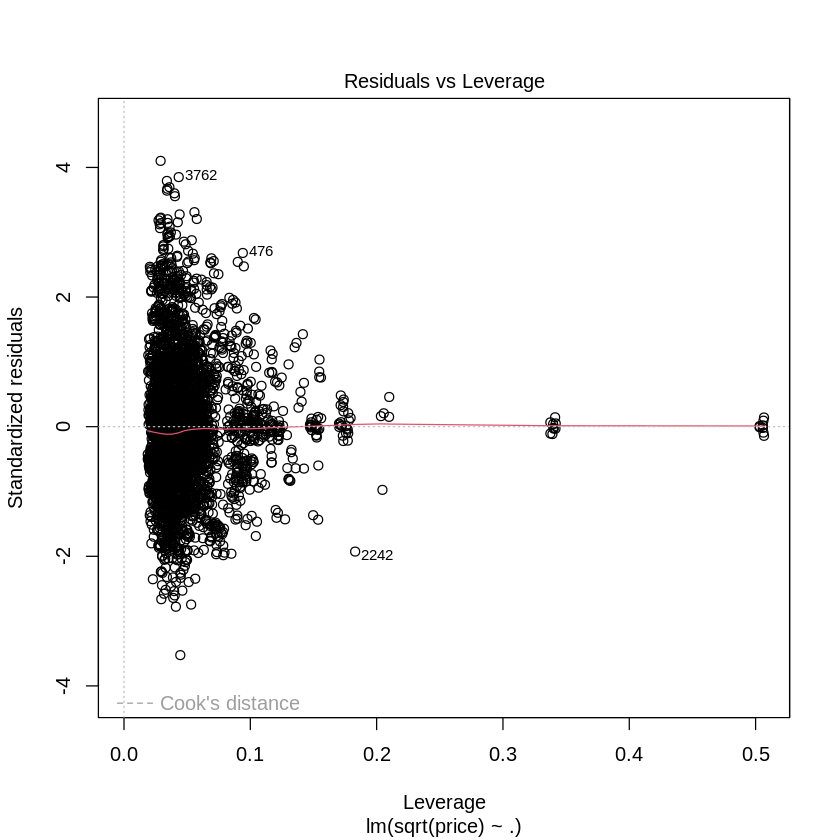

In [94]:
# Additional plot to examine influence and leverage
plot(sqrt_lm, which = 5)  # Cook's distance plot


### Residuals vs. Leverage Analysis:
* **Expectation**:
  * The x-axis represents "Leverage". Observations near the mean of the predictors have low leverage, while observations far from the mean have high leverage.
  * The y-axis represents "Standardized residuals," indicating the deviation of the observed values from the values predicted by the model, scaled in terms of the standard error.
  * The horizontal dotted lines represent reference lines for Cook's distance.This helps us to  identify potentially influential points.
  * The red line is typically a smooth fit to the data. A horizontal line with no pattern suggests that residuals are randomly distributed, not influenced by leverage.

* **Observation**:
  * Points with low leverage clustered around the mean of the predictors.
  * Observed a few points with higher leverage. These are the points that can potentially influence the regression line more than others.
  * The points that are far from zero on the y-axis are the ones with large residuals — these could be outliers or points that the model does not predict well.
  * The points "3762", "2442" exceed certain thresholds in terms of leverage or residual size, or both are highlighted by the plotting function.

# Model Selection

## backward elimination process

In [95]:
if (!require(stats)) {
    install.packages("stats")
    library(stats)
}

# function to calculate the Mean Squared Prediction Error
calculate_mean_squared_prediction_error <- function(model, data) {
    predictions <- predict(model, newdata = data)
    return(mean((data$price - predictions)^2))
}

# Fit the full model using all available predictors from the training set
full_linear_model <- sqrt_lm

In [96]:

# Initialize the model as the current best model for comparison
current_best_model <- full_linear_model
current_best_model_mspe <- calculate_mean_squared_prediction_error(current_best_model, test_data)


In [97]:

# Vector to store the Mean Squared Prediction Error after each elimination step
mspe_values_after_each_step <- current_best_model_mspe

#  backward elimination process
repeat {
  # Get the summary of the current best model
  best_model_summary <- summary(current_best_model)

  # Extract p-values, excluding the intercept
  variable_p_values <- coef(best_model_summary)[, "Pr(>|t|)"][-1]


  # Determine the maximum p-value and the associated variable name
  max_p_value <- max(variable_p_values)
  variable_name_to_remove <- names(which.max(variable_p_values))

  # Stop if all variable p-values are below the significance level threshold
  if (max_p_value < 0.15) {
    break
  }

  # Update the model formula by removing the variable with the highest p-value
  updated_model_formula <- as.formula(paste("sqrt(price) ~ . -", variable_name_to_remove))
  model_with_variable_removed <- update(current_best_model, updated_model_formula)

  # Calculate the MSPE for the model with the variable removed
  mspe_with_variable_removed <- calculate_mean_squared_prediction_error(model_with_variable_removed, test_data)

  # Append the new MSPE to the tracking vector
  mspe_values_after_each_step <- c(mspe_values_after_each_step, mspe_with_variable_removed)

  # Update the current best model if the new MSPE is lower
  if (mspe_with_variable_removed < current_best_model_mspe) {
    current_best_model <- model_with_variable_removed
    current_best_model_mspe <- mspe_with_variable_removed
  } else {
    # If the MSPE did not improve, exit the loop
    break
  }
}

# Print the MSPE values collected after each model update
print(mspe_values_after_each_step)


[1] 1013945382 1013945382


Warning message:
“not plotting observations with leverage one:
  1151, 1825, 2806”


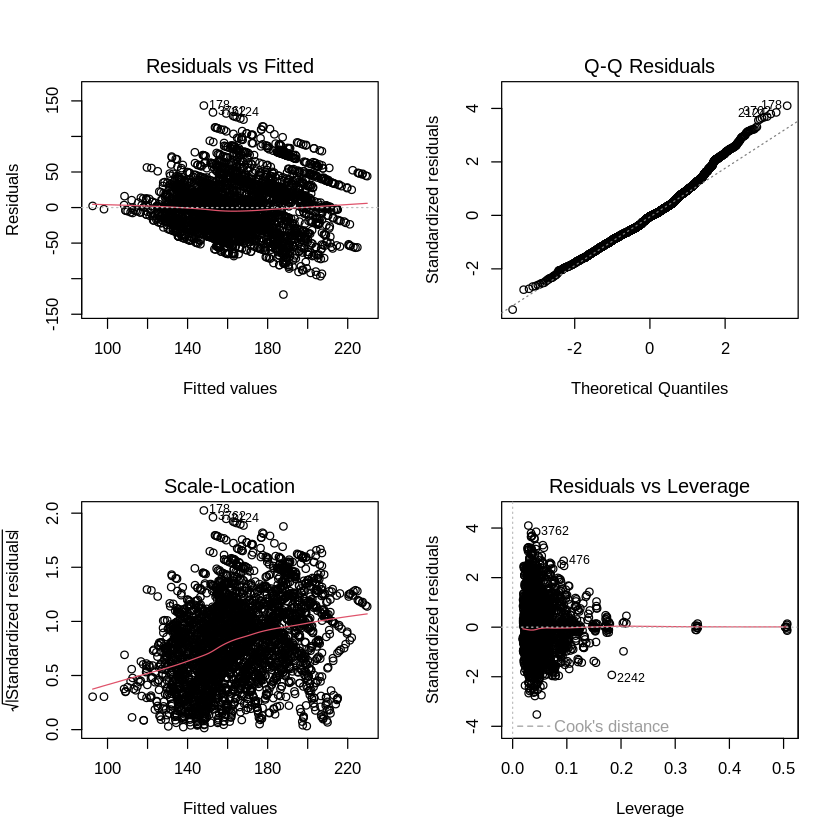

In [98]:
par(mfrow = c(2, 2))
plot(current_best_model)

## Best Model Analysis


**Residuals vs. Fitted:**
* **Expectation**: The points should be randomly dispersed with no clear patterns.
* **Observation**: There appears to be a curve in the pattern of points, suggesting the possibility of a non-linear relationship.

Normal Q-Q (Quantile-Quantile):
* **Expectation**: Points should lie on the reference line if the residuals are normally distributed.
* **Observation**: While most points align, some at the right ends deviate. This indicates that the right tails of the distribution are deviating from the line and are not followig the normality.

Scale-Location (Spread vs. Fitted Values):
* **Expectation**: The spread of residuals should be consistent across the range of fitted values.
* **Observation**:  The spread of residuals is fairly constant across the range of fitted values. This suggests that the model follows homoscedasticity.

Residuals vs. Leverage:
* **Expectation**:
  * The x-axis represents "Leverage". Observations near the mean of the predictors have low leverage, while observations far from the mean have high leverage.
  * The y-axis represents "Standardized residuals," indicating the deviation of the observed values from the values predicted by the model, scaled in terms of the standard error.
  * The horizontal dotted lines represent reference lines for Cook's distance.This helps us to  identify potentially influential points.
  * The red line is typically a smooth fit to the data. A horizontal line with no pattern suggests that residuals are randomly distributed, not influenced by leverage.

* **Observation**:
  * Points with low leverage clustered around the mean of the predictors.
  * Observed a few points with higher leverage. These are the points that can potentially influence the regression line more than others.
  * The points that are far from zero on the y-axis are the ones with large residuals — these could be outliers or points that the model does not predict well.
  * The points "3463", "476" exceed certain thresholds in terms of leverage or residual size, or both are highlighted by the plotting function.

## Finding the index of best model with lowest MSPE

In [99]:
# Find the index of the best model with the lowest MSPE
bestMSPE_Index <- which.min(mspe_values_after_each_step)
# Retrieve the best MSPE value using the index
bestMSPE <- mspe_values_after_each_step[bestMSPE_Index]

cat("Using MSPE as a criterion, best model is model- ", bestMSPE_Index,
    "with MSPE Value equal to ", bestMSPE, "\n")

Using MSPE as a criterion, best model is model-  1 with MSPE Value equal to  1013945382 


## Best model has an MSPE value of 1013945382

## AIC/BIC/Adjusted R-squared

In [100]:
library(MASS) # For stepAIC

suppressWarnings({
# Define the full model with all predictors
full_model <- lm(sqrt(price) ~ ., data = train_data)

variables_to_remove <- c('annual_income', 'genderFemale', 'genderMale',
                         'body_styleHatchback', 'body_stylePassenger',
                         'body_styleSedan', 'body_styleSUV', 'transmissionManual',
                         'colorPale', 'colorWhite', 'colorRed')

variables_to_remove <- variables_to_remove[variables_to_remove %in% names(train_data)]

# calculate the Mean Squared Prediction Error
calculate_mspe <- function(model, data) {
  predictions <- predict(model, newdata = data)
  return(mean((data$price - predictions)^2))
}

# Initialize lists to store the best models and their criteria
best_models <- vector("list", length(variables_to_remove))
best_models_criteria <- vector("list", length(variables_to_remove))

for (i in 1:length(variables_to_remove)) {
  # Compute all combinations of i variables to remove
  combinations <- combn(variables_to_remove, i, simplify = FALSE)

  # Loop over each combination
  for (vars in combinations) {
    # Create the model formula by excluding the combination of variables
    formula <- as.formula(paste("sqrt(price) ~ . -", paste(vars, collapse = " - ")))
    # Fit the model
    model <- lm(formula, data = train_data)

    # Calculate AIC, BIC, adjusted R-squared, and MSPE
    aic <- AIC(model)
    bic <- BIC(model)
    adj_r_squared <- summary(model)$adj.r.squared
    mspe <- calculate_mspe(model, test_data)

    # Store the model if it is the first or if it improves upon the previous model for this size
    if (is.null(best_models[[i]]) || aic < best_models_criteria[[i]]$aic) {
      best_models[[i]] <- model
      best_models_criteria[[i]] <- list(aic = aic, bic = bic, adj_r_squared = adj_r_squared, mspe = mspe)
    }
  }
}

# Determine the overall best models according to AIC, BIC, and Adjusted R-squared
best_model_aic <- best_models[[which.min(sapply(best_models_criteria, `[[`, "aic"))]]
best_model_bic <- best_models[[which.min(sapply(best_models_criteria, `[[`, "bic"))]]
best_model_adj_r_squared <- best_models[[which.max(sapply(best_models_criteria, `[[`, "adj_r_squared"))]]

cat("The best model according to AIC has the size:", which.min(sapply(best_models_criteria, `[[`, "aic")), "\n")
cat("The best model according to BIC has the size:", which.min(sapply(best_models_criteria, `[[`, "bic")), "\n")
cat("The best model according to Adjusted R-squared has the size:", which.max(sapply(best_models_criteria, `[[`, "adj_r_squared")), "\n")
})


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




The best model according to AIC has the size: 6 
The best model according to BIC has the size: 6 
The best model according to Adjusted R-squared has the size: 6 


## Analysis:

* The best model according to AIC has the size: 6
* The best model according to BIC has the size: 6
* The best model according to Adjusted R-squared has the size: 6

## Removing features and refitting model.

In [101]:
library(MASS) # For stepAIC


# Define the full model with all predictors
full_model <- lm(sqrt(price) ~ ., data = train_data)

variables_to_remove <- c('annual_income', 'genderFemale', 'genderMale',
                         'body_styleHatchback', 'body_stylePassenger',
                         'body_styleSedan', 'body_styleSUV', 'transmissionManual',
                          'colorRed')

variables_to_remove <- variables_to_remove[variables_to_remove %in% names(train_data)]

# Function to calculate the Mean Squared Prediction Error
calculate_mspe <- function(model, data) {
  predictions <- predict(model, newdata = data)
  mspe <- mean((data$price - predictions)^2)
  return(mspe)
}

# Initialize lists to store the best models and their criteria
model_results <- list()

# Loop over the number of variables to remove
for (i in 1:length(variables_to_remove)) {
    # Compute all combinations of i variables to remove
    combinations <- combn(variables_to_remove, i, simplify = FALSE)

    # Loop over each combination
    for (vars in combinations) {
        # Create the model formula by excluding the combination of variables
        formula <- as.formula(paste("sqrt(price) ~ . -", paste(vars, collapse = " - ")))
        # Fit the model
        model <- lm(formula, data = train_data)

        # Calculate AIC, BIC, adjusted R-squared, and MSPE
        aic <- AIC(model)
        bic <- BIC(model)
        adj_r_squared <- summary(model)$adj.r.squared
        mspe <- calculate_mspe(model, test_data)

        # Store the model information
        model_info <- list(
            model = model,
            aic = aic,
            bic = bic,
            adj_r_squared = adj_r_squared,
            mspe = mspe,
            removed_variables = vars
        )

        # Append model information to the results list
        model_results[[length(model_results) + 1]] <- model_info
    }
}

# for (result in model_results) {
#     cat("Removed Variables: ", paste(result$removed_variables, collapse=", "), "\n",
#         "AIC: ", result$aic, "\n",
#         "BIC: ", result$bic, "\n",
#         "Adjusted R-squared: ", result$adj_r_squared, "\n",
#         "MSPE: ", result$mspe, "\n\n")
# }

# Identify and print the best models according to AIC, BIC, and adjusted R-squared
best_by_aic <- min(sapply(model_results, `[[`, "aic"))
best_by_bic <- min(sapply(model_results, `[[`, "bic"))
best_by_adj_r2 <- max(sapply(model_results, `[[`, "adj_r_squared"))

cat("Best AIC: ", best_by_aic, "\n")
cat("Best  BIC: ", best_by_bic, "\n")
cat("Best Adjusted R-squared: ", best_by_adj_r2, "\n")


Best AIC:  38355.93 
Best  BIC:  39555.85 
Best Adjusted R-squared:  0.235483 


## Best AIC/BIC/R-squared values
| Model Selection          |  Value |
|--------------------------|------------|
| Best Model by AIC        | 38355.93   |
| Best Model by BIC        | 39555.85   |
| Best Model by Adjusted R-squared | 0.235483 |



# EDA


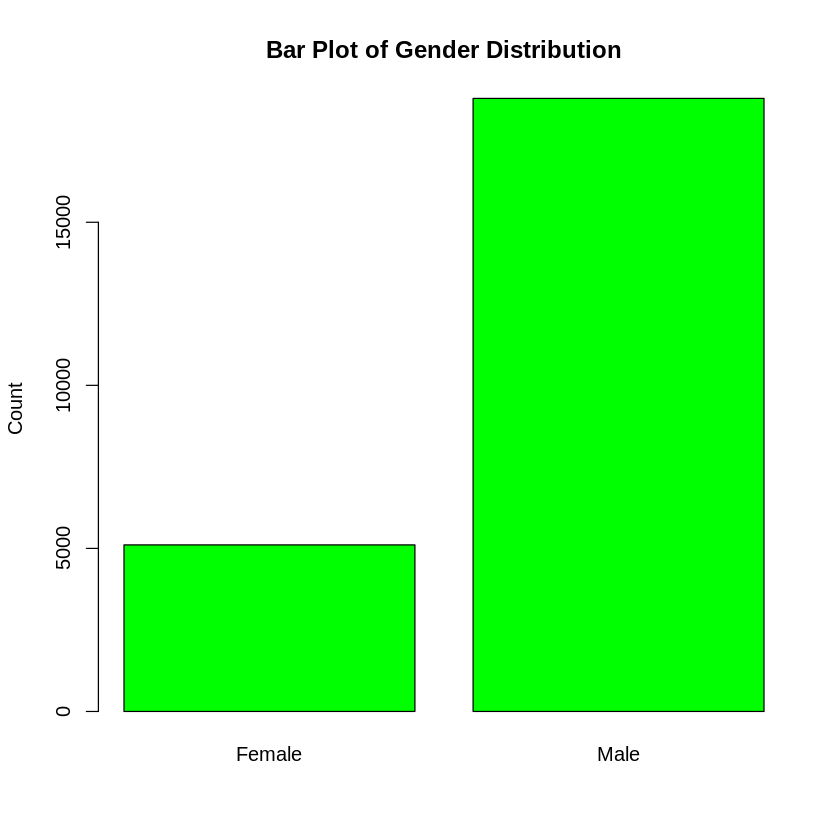

In [102]:
table <- table(car_sales_data$gender)
barplot(table, main = "Bar Plot of Gender Distribution", col = "green", ylab = "Count")


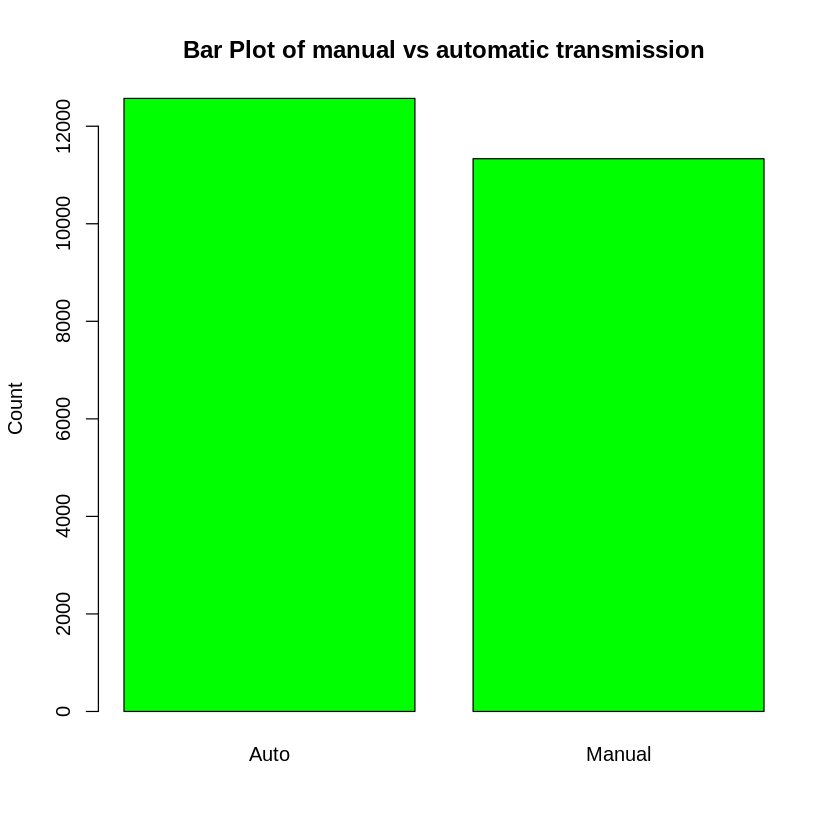

In [103]:
table <- table(car_sales_data$transmission)
barplot(table, main = "Bar Plot of manual vs automatic transmission", col = "green", ylab = "Count")


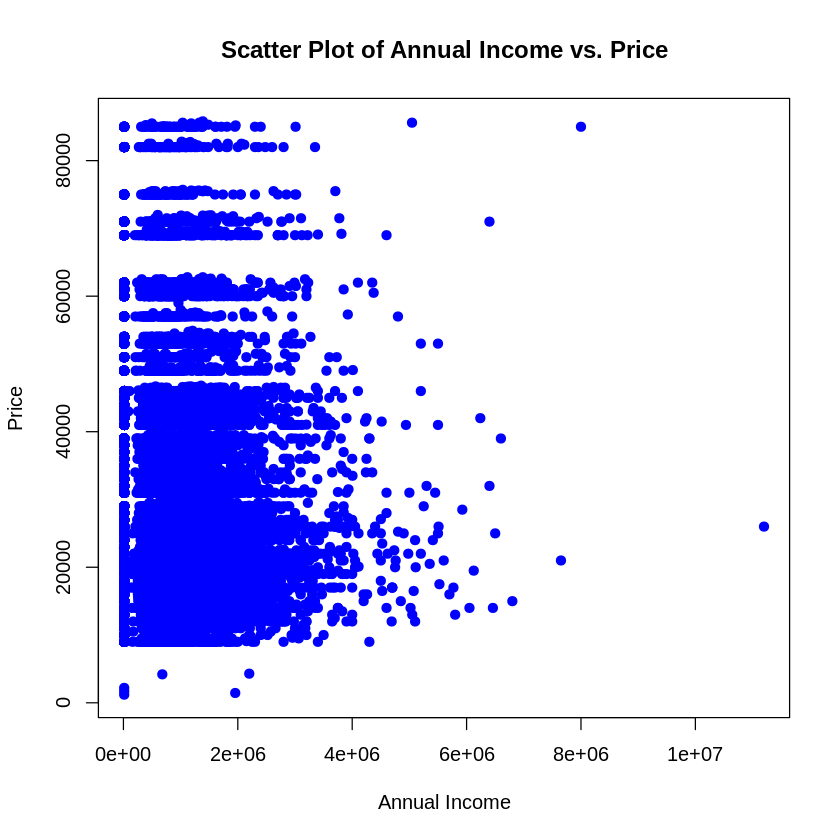

In [104]:
# Scatter plot of Annual Income vs. Price
plot(car_sales_data$annual_income, car_sales_data$price, main = "Scatter Plot of Annual Income vs. Price", xlab = "Annual Income", ylab = "Price", pch = 19, col = "blue")


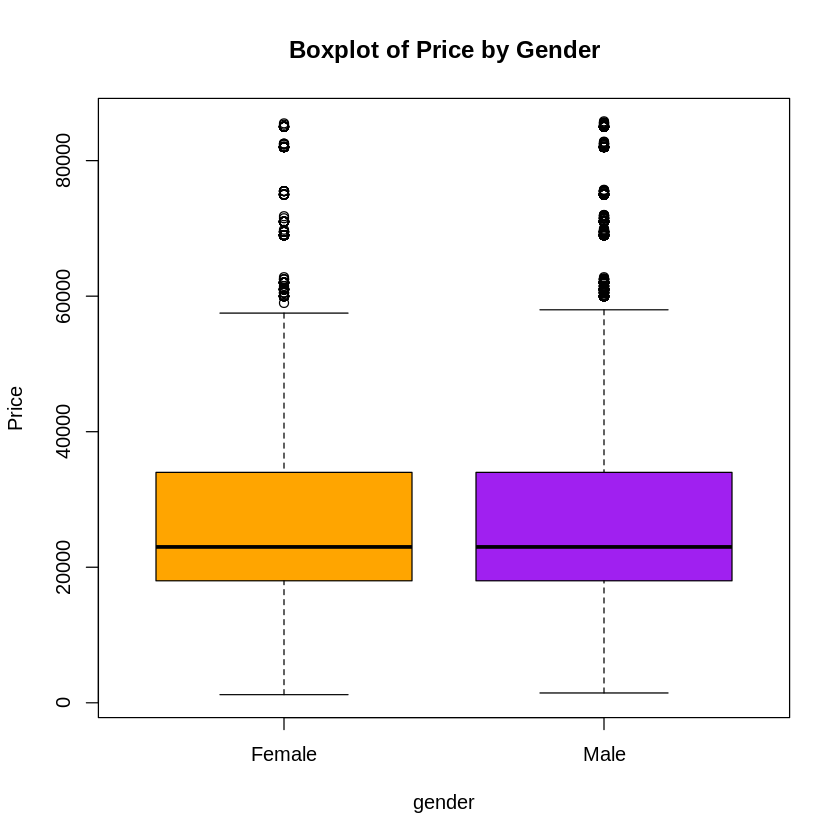

In [105]:
# Boxplot of Price by Gender
boxplot(price ~ gender, data = car_sales_data, main = "Boxplot of Price by Gender", ylab = "Price", col = c("orange", "purple"))


# Report

## Introduction

### Why am I interested in this problem?
I am interested in understanding the trends and patterns in car sales which can help in making informed business decisions regarding marketing strategies, inventory management, and customer segmentation.

### Relevant background information for readers:
This data provides insights into car sales across various regions, customer demographics, car preferences, and pricing. It can help in analyzing market demands and customer preferences.

### Prior research on this topic:
Consumer behavior in car purchases, effects of demographics on car choice, and regional sales performance. This provides a comparative analysis to understand any deviations or trends in the car sales data.

### Data Source:
The dataset originates from a collection showcased at a LinkedIn event targeted at students, designed to offer practical insights into real-world data analysis. It was later revealed that the actual source of the data is a Kaggle dataset titled "Car Sales Report," available for public access.

 This dataset aggregates transactions from various dealerships, capturing detailed sales records including buyer demographics, car specifications, and transaction details. The collection method involved aggregating these details from multiple car dealers, making it a rich source for observational study in car sales trends without experimental intervention.

### Questions of interest that I hope to answer:

* Do the mean prices and mean annual incomes significantly differ from their hypothesized values?
* Is there a significant difference in the proportion of SUVs produced by car manufacturers between the years 2020 and 2021?
* Is there a significant difference in car prices between manual and automatic transmissions across the years 2020 and 2021?


## Methods and Results

### Pre-processing:

To prepare the car sales dataset for exploratory data analysis (EDA), several preprocessing steps are essential to ensure the data is clean, accurate, and suitable for analysis. Here’s a detailed description of the EDA methods used before analyis:

* **Identifying NULL values:**

   Identified missing values in each column of the dataset.
  ```r
  missing_values <- sapply(car_sales_data, function(x) sum(is.na(x)))
```

| Column        | MissingCount |
|---------------|--------------|
| date          | 0            |
| gender        | 0            |
| annual_income | 0            |
| dealer_name   | 0            |
| company       | 0            |
| model         | 0            |
| engine        | 0            |
| transmission  | 0            |
| color         | 0            |
| price         | 0            |
| dealer_no     | 0            |
| body_style    | 0            |
| dealer_region | 0            |


* **Duplicate values:**  Removed duplicates to ensure each data point is unique for the analysis.

  ```r
  duplicates <- sum(duplicated(car_sales_data))

  ````

* Data Type Checking: Ensured that numerical and categorical columns are type checked and corrected.

  ```r
  data_types <- sapply(car_sales_data, class)
  data_types_df <- data.frame(
                  Column = names(data_types),
                  data_type = data_types, stringsAsFactors = FALSE)
  ```

* Removed irrelevant features such as `car_id`, `phone`, and `customer_name` as they are almost static and no interesting patterns can be found using these features.

* **Summary Statistics:**
 Generated descriptive statistics that summarize central tendency, dispersion, and shape of the dataset’s numerical attributes.

  ```r
  summary_statistics_numeric <- car_sales_data %>%
                                select_if(is.numeric) %>%
                                summary()
  ```

|             | price | annual_income |
|-------------|-------|---------------|
| Min.        | 1200  | 10080         |
| 1st Qu.     | 18001 | 386000        |
| Median      | 23000 | 735000        |
| Mean        | 28090 | 830840        |
| 3rd Qu.     | 34000 | 1175750       |
| Max.        | 85800 | 11200000      |


* Visualized the Bar charts for gender and transmission featues.
* Scatter plots to check for relationships and correlations between price and annual income features.
* Box plots for gender to visualize statistical summaries and identify outliers.


**The Shapiro-Wilk analysis requires data records to be in the range of `3 <= number of records < 5000`. Therefore, based on this requirement, we created a new sample of size 20% from the original population using stratified sampling technique.**

We can perform Hypothesis testing, bootstrapping, permutation tests, and regression modeling to answer the questions of interest.

### Analysis
***
#### Bootstrapping
***
Bootstrap resampling involves repeatedly sampling with replacement from the original data to estimate the sampling distribution of a statistic.
Here, we estimated the mean of the price and annual incomes of the car sales data using bootstrapping.

Histograms are created to visualize the distribution of the scaled bootstrap means for both variables.

Additionally, Q-Q plots are generated to assess whether the scaled bootstrap means follow a normal distribution.


**Interpretation:**

The graphs confirmed that the bootstrapped samples from price and annual incomes were almost normally distributed. This is additionally confirmed by the qq-plots where some points at the right tail were deviated from the reference line.

#### Confidence Intervals for Bootstrapped data

| Variable | Lower CI | Mean Value | Upper CI |
|----------|----------|------------|----------|
| Price    | 27896.40 | 28088.00   | 28279.62 |
| Income   | 821611.5 | 830600.66  | 839589.8 |

#### Hypothesis Test on Bootstrapped data:

* Null Hypothesis:The mean price or mean annual income equals the hypothesized value.

* Alternative Hypothesis:The mean price or mean annual income does not equals the hypothesized value.

#### Hypothesis Test Results/ Analysis:


| Variable | Hypothesized Mean | Confidence Interval | Within CI | T-Statistic | P-Value |
|----------|-------------------|---------------------|------------|-------------|---------|
| Price    | 28370.94          | [27896.40, 28279.62]| FALSE      | -91.52233   | 0       |
| Income   | 842311.3          | [821611.5, 839589.8] | FALSE      | -80.74525   | 0       |



1. Price:
  * The hypothesized mean price is $28370.94.
  * The observed price falls outside the confidence interval limits.
  * The t-statistic value of -91.52233 suggests a significant deviation from the hypothesized mean.
  * A p-value of 0, indicates strong evidence to `reject the null hypothesis`.

2. Income:
  * The hypothesized mean income is $842311.3.
  * Similar to price, the observed income falls outside the confidence interval limits.
  * The t-statistic value of -80.74525 suggests a significant deviation from the hypothesized mean.
  * A p-value of 0, indicates strong evidence `against the null hypothesis`.

####  Normality check on Bootstrapped data:

|   R | P_Value  |
|-----|----------|
| 500 | 0.4454739|
|1000 | 0.6276020|
|2000 | 0.2422149|
|4000 | 0.2963930|
|4999 | 0.1103231|

Since, all the samples have a p-value greater than the threshold of 0.05, we can conclude that the boostrapped data is following normality.
***
#### ` Two - tailed T-test`
***
**Null Hypothesis (H0):** The proportion of SUVs produced by car manufacturers in 2020 is the same as the proportion produced in 2021.

**Alternative Hypothesis (H1):** The proportion of SUVs produced by car manufacturers in 2020 is different from the proportion produced in 2021, indicating a shift in consumer demand towards larger vehicles.

  **Statistical method used: two tailed T-test**

Assumptions: Data Should follow normality.
* Shapiro-wilk Test Used to check normality

```r
# Calculate the differences between the two years for each company
suv_proportions_wide$differences <- suv_proportions_wide$`2021` - suv_proportions_wide$`2020`
# Perform the Shapiro-Wilk test for normality on these differences
normality_test_results <- shapiro.test(suv_proportions_wide$differences)
```
Since the w value from the test results is close to 1, we can say that the data set is following normality.

| Test            | Value    |
|-----------------|----------|
| Test statistic - W value | 0.94087  |
| p-value         | 0.1409   |

**Interpretation of Shapiro-wilk Test:**

p-value is greater than the threshold of 0.05 and w-statistic is close to 1. So, we can conclude that the data is following normality.

#### Code Snippet for Two-tailed t-test
  ```r
  suv_proportions_clean <- na.omit(suv_proportions_wide)
  differences <-suv_proportions_clean$`2021`  - suv_proportions_clean$`2020`
  mean_diff <- mean(differences)
  sd_diff <- sd(differences)

  n <- length(differences)

  t_value <- mean_diff / (sd_diff / sqrt(n))
  df <- n-1
  p_value <- 2 * pt(-abs(t_value), df)  # two-tailed test

  ```
#### Result:
| Measurement                      | Value      |
|----------------------------------|------------|
| Mean of differences              | 0.02597654 |
| Standard deviation of differences| 0.08213114 |
| t-Value                          | 1.612724   |
| Degrees of freedom               | 25         |
| p-Value                          | 0.1193583  |


#### Two-tailed t-test Analysis:
* Mean difference is positive. So, the number of SUV's made in 2021 are more than 2020.

* A p-value $= 0.1193583$. So, there is $11.9\%$ chance of finding difference in proportions.
  
* The 95% confidence interval $-0.05915002 \text{ to } 0.007196951$. So, we don't have enough evidence to reject the NULL hypothesis.

***
#### `Hypothesis Testing with Randomization`
***
* Null Hypothesis (H0): There is no difference in car prices between manual and automatic transmissions.
* Alternative Hypothesis (H1): There is a difference in car prices between manual and automatic transmissions.

#### Analysis

| Year | Observed Difference | p-value | Significance Level | Conclusion |
|------|---------------------|---------|--------------------|------------|
| 2020 | `$2034.726`             | 0.002   | 0.05               | reject null hypothesis |
| 2021 | `$630.0765`          | 0.2808  | 0.05               | No evidence to reject null hypothesis |


For year 2020: There is evidence of a pricing difference between transmission types, so we can reject the NULL hypothesis.

For year 2021, there is no enough evidence to reject the null hypothesis.

#### Confidence Intervals for Hypothesis with Randomization Test


|     Year 2020        | Value                |
|-------------|----------------------|
| Observed Diff | -2034.72  |
| Confidence Interval (2.5%) | -1212.71 |
| Confidence Interval (97.5%) | 1237.54  |

|    Year 2021         | Value                |
|-------------|----------------------|
| Observed Diff | 630.08  |
| Confidence Interval (2.5%) | -1150.24  |
| Confidence Interval (97.5%) | 1132.27|

***
#### **Regression Modeling**
***
Sampled dataset is divided into train/test datasets with 80%, 20% size respectively.
```r
# Create training and testing datasets
train_data <- strat_sample[train_indices, ]
test_data <- strat_sample[-train_indices, ]
```

Simple Linear Regression model is created between  price and annual income and then calculated the fitted values and residuals using pearson's method.

```r
model <- lm(price ~ annual_income, data = train_data)
```




#### Simple Linear Regression Analysis:

* **Linearity**:
most of the points are closeto/along the line of reference. so, linearity exists.
* **Homoscedasticity**: The datapoints are not having constant variance. So homoscedasticity fails with mlr model.

* **Outliers**: Outliers exists mostly at the extremes.

* **Normality**:
There are some points deviating from the red line, particularly at the tails of the graph. This indicates that there may be some skewness in the dataset.So, model is not following the normality principle.

#### Analysis after applying log transformation:
* **Linearity**: Not violated

* **Homoscedasticity**: variance is constant with square root transformation

* Outliers: potential outliers exists even after applying transformation.


* Normality: Not met even after applying square root transformation.


#### Simple Linear Regression Predictions:


| Metric                    | Value                 |
|---------------------------|-----------------------|
| Training RMSE             | 0.471    |
| Test RMSE                 | 0.488    |
| Training R-Squared        | 0.00002 |
| Training Adjusted R-Squared | -0.00023 |

By considering the predictions, we can conclude that the model is weak in terms of predicting the target variable even after applying square root transformations.

***
#### **Multiple Linear Regression**
***
created dummy variables for all the categorical variables and omitting the intercept.
```r
dummy_variables_matrix <- model.matrix(~ gender + company +
                          model + engine + transmission + color +
                          body_style + dealer_region - 1, data=strat_sample)
```
After encoding the categorical variables, multiple linear regression model is created between all the features as predictors and price as outcome variable.

```r
lm_dummies = lm(price ~ . ,  data = train_data)
```
once the model is fitted, then plotted graphs against
 * Linearity check: observed values vs predicted variables
 * Constant variance check: yhat and r-square.
 * Normality check: Q-Q plot

#### Observations:
* Linearity is violated.
* Variance is not constant across the plotted residuals. So, heteroscedasticity exists.
* Normality: Most of the points appear to follow the red line closely from -2 to 2. So, the model is not fully follwing normal distribution. Only a subset of the datapoints are following normality principle.

#### Analysis of MLR with Transformations:
* **Linearity:** MLR follows linearity with/without applying transformations.
* **Shapiro -wilk Test**: p-value < 2.2e-16. So, the error terms are not following normality even after applying transformations.
* **Durbin-Watson Test**: DW Statistic is 2.0013 and p-value is greater than the threshold value of 0.05. So, we can conclude that there is no auto-correlation exists in the MLR model.
* **Residuals vs Leverage** Check:
The points "3762", "2442" exceed certain thresholds in terms of leverage or residual and observed a few points with higher leverage.

***
#### **Model Selection:**
***

Performed backward elimination for the previously created regression models.This method iteratively removes variables with the highest p-values until all variables have p-values below a significance threshold.

It calculates the Mean Squared Prediction Error (MSPE) for each updated model, storing the values for comparison. If the MSPE decreases with variable removal, the model is updated. The process continues until no further improvement is observed.

Finally, prints the MSPE values collected after each model update.

#### Best Model Analysis


**Residuals vs. Fitted:**
* **Expectation**: The points should be randomly dispersed with no clear patterns.
* **Observation**: There appears to be a curve in the pattern of points, suggesting the possibility of a non-linear relationship.

Normal Q-Q (Quantile-Quantile):
* **Expectation**: Points should lie on the reference line if the residuals are normally distributed.
* **Observation**: While most points align, some at the right ends deviate. This indicates that the right tails of the distribution are deviating from the line and are not followig the normality.

Scale-Location (Spread vs. Fitted Values):
* **Expectation**: The spread of residuals should be consistent across the range of fitted values.
* **Observation**:  The spread of residuals is fairly constant across the range of fitted values. This suggests that the model follows homoscedasticity.

Residuals vs. Leverage:
* **Expectation**:
  * The x-axis represents "Leverage". Observations near the mean of the predictors have low leverage, while observations far from the mean have high leverage.
  * The y-axis represents "Standardized residuals," indicating the deviation of the observed values from the values predicted by the model, scaled in terms of the standard error.
  * The horizontal dotted lines represent reference lines for Cook's distance.This helps us to  identify potentially influential points.
  * The red line is typically a smooth fit to the data. A horizontal line with no pattern suggests that residuals are randomly distributed, not influenced by leverage.

* **Observation**:
  * Points with low leverage clustered around the mean of the predictors.
  * Observed a few points with higher leverage. These are the points that can potentially influence the regression line more than others.
  * The points that are far from zero on the y-axis are the ones with large residuals — these could be outliers or points that the model does not predict well.
  * The points "3463", "476" exceed certain thresholds in terms of leverage or residual size, or both are highlighted by the plotting function.


#### Finiding the index of model with lowest MSPE:

```r
# Find the index of the best model with the lowest MSPE
bestMSPE_Index <- which.min(mspe_values_after_each_step)
# Retrieve the best MSPE value using the index
bestMSPE <- mspe_values_after_each_step[bestMSPE_Index]

cat("Using MSPE as a criterion, best model is model- ", bestMSPE_Index,
    "with MSPE Value equal to ", bestMSPE, "\n")
```
**Observation**: Using MSPE as a criterion, best model is model-  1 with MSPE Value equal to  1013945382

#### AIC/BIC/R-Squared:
Iteratively removed selected features from the fitted model and then updated the model with revised feature set to compute the AIC, BIC and r-squared values for the revised model.

#### Best AIC/BIC/R-squared values
| Model Selection          |  Value |
|--------------------------|------------|
| Best Model by AIC        | 38355.93   |
| Best Model by BIC        | 39555.85   |
| Best Model by Adjusted R-squared | 0.235483 |

## Conclusion:
### Conclusions and Assumptions:

Through this analysis, we concluded that the linear regression model is functional with some limitations due to violation of some key assumptions.

* **Residual Analysis**: The deviations observed in the Q-Q plot suggest challenges with normality.
* **Outlier Analysis**: The presence of outliers and some influential points might be the reason for the model to predict weakly.
* **Predictive Accuracy**: The RMSE values for both training and test datasets show reasonable error margins, but the low R-squared values explains about the model's explanatory power and its generalizability to other data sets.

From this analysis, learned the importance of thoroughly testing statistical assumptions and exploring data characteristics before finalizing a model. These steps are crucial for understanding the limitations and potential biases in model predictions.

### Ideas for extending the research:

**Exploring Additional Data Transformations**: Given the issues with non-normal residuals and heteroscedasticity, applying different transformations or adopting non-linear models could help in achieving better model fit and prediction accuracy.

Advanced Modeling Techniques: Exploring machine learning methods like random forests or gradient boosting machines, which can handle non-linearity and complex interactions more effectively than linear regression, might provide better predictive performance.
